# SR-Adam Quick Launcher
This notebook is a minimal launcher. For full details see README and QUICK_START. Run or tweak the cells below.

In [ ]:
import os
if 'google.colab' in str(get_ipython()):
    if not os.path.exists('/content/SR-Adam'):
        !git clone https://github.com/mamintoosi-papers-codes/SR-Adam.git
    %cd /content/SR-Adam
    !pip install -r requirements-cpu.txt

In [ ]:
# Example run on a single dataset (CIFAR10) with specific settings
%run main.py \
  --dataset CIFAR10 \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 5 \
  --noise 0.1 \
  --optimizers "adam|sradam" \
  --clean_previous

Using device: cuda
GPU: NVIDIA GeForce RTX 3090

=== Dataset: CIFAR10 | Noise: 0.0 ===
Using model: simplecnn
Files already downloaded and verified
Files already downloaded and verified

Optimizer: SGD (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 1/20 | Train Loss: 2.2641 | Train Acc: 16.46% | Test Loss: 2.2019 | Test Acc: 22.35% | Time: 29.91s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]


Epoch 10/20 | Train Loss: 1.6857 | Train Acc: 39.17% | Test Loss: 1.7410 | Test Acc: 37.69% | Time: 29.12s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  3.96it/s]


Epoch 20/20 | Train Loss: 1.4917 | Train Acc: 46.01% | Test Loss: 1.4349 | Test Acc: 47.99% | Time: 27.70s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SGD\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SGD\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]


Epoch 1/20 | Train Loss: 2.2566 | Train Acc: 16.05% | Test Loss: 2.1905 | Test Acc: 23.79% | Time: 25.97s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.16it/s]


Epoch 10/20 | Train Loss: 1.6997 | Train Acc: 38.73% | Test Loss: 1.6061 | Test Acc: 42.10% | Time: 26.24s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  4.03it/s]


Epoch 20/20 | Train Loss: 1.5035 | Train Acc: 45.75% | Test Loss: 1.4452 | Test Acc: 48.23% | Time: 27.06s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SGD\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SGD\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  3.93it/s]


Epoch 1/20 | Train Loss: 2.2579 | Train Acc: 16.37% | Test Loss: 2.1869 | Test Acc: 21.59% | Time: 27.77s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.12it/s]


Epoch 10/20 | Train Loss: 1.6859 | Train Acc: 39.20% | Test Loss: 1.6069 | Test Acc: 42.34% | Time: 26.48s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  3.97it/s]


Epoch 20/20 | Train Loss: 1.5066 | Train Acc: 45.57% | Test Loss: 1.4202 | Test Acc: 48.14% | Time: 27.49s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SGD\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SGD\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]


Epoch 1/20 | Train Loss: 2.2408 | Train Acc: 18.35% | Test Loss: 2.1539 | Test Acc: 25.69% | Time: 26.83s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]


Epoch 10/20 | Train Loss: 1.6739 | Train Acc: 39.53% | Test Loss: 1.5968 | Test Acc: 42.81% | Time: 26.00s


Epoch 20/20: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]


Epoch 20/20 | Train Loss: 1.4987 | Train Acc: 45.83% | Test Loss: 1.4056 | Test Acc: 50.01% | Time: 25.94s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SGD\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SGD\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]


Epoch 1/20 | Train Loss: 2.2511 | Train Acc: 18.23% | Test Loss: 2.1735 | Test Acc: 23.26% | Time: 26.05s


Epoch 10/20: 100%|██████████| 98/98 [00:24<00:00,  4.03it/s]


Epoch 10/20 | Train Loss: 1.6756 | Train Acc: 39.46% | Test Loss: 1.6275 | Test Acc: 41.48% | Time: 27.13s


Epoch 20/20: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]


Epoch 20/20 | Train Loss: 1.4937 | Train Acc: 46.05% | Test Loss: 1.4154 | Test Acc: 49.60% | Time: 26.10s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SGD\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SGD\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.0\SGD\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.0\SGD\batch_size_512\runs_and_aggregate.xlsx

Optimizer: Momentum (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]


Epoch 1/20 | Train Loss: 2.0338 | Train Acc: 25.46% | Test Loss: 1.7746 | Test Acc: 36.11% | Time: 26.08s


Epoch 10/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 10/20 | Train Loss: 1.1333 | Train Acc: 59.41% | Test Loss: 1.0208 | Test Acc: 64.31% | Time: 26.82s


Epoch 20/20: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]


Epoch 20/20 | Train Loss: 0.9125 | Train Acc: 67.80% | Test Loss: 0.8210 | Test Acc: 72.57% | Time: 28.61s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Momentum\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Momentum\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]


Epoch 1/20 | Train Loss: 2.0545 | Train Acc: 24.87% | Test Loss: 1.7848 | Test Acc: 35.88% | Time: 28.62s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 10/20 | Train Loss: 1.1437 | Train Acc: 58.95% | Test Loss: 1.0062 | Test Acc: 65.20% | Time: 30.10s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.70it/s]


Epoch 20/20 | Train Loss: 0.9149 | Train Acc: 67.65% | Test Loss: 0.8388 | Test Acc: 70.95% | Time: 29.43s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Momentum\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Momentum\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 1/20 | Train Loss: 2.0323 | Train Acc: 26.05% | Test Loss: 1.7367 | Test Acc: 37.90% | Time: 30.52s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.72it/s]


Epoch 10/20 | Train Loss: 1.1592 | Train Acc: 58.51% | Test Loss: 1.0192 | Test Acc: 64.14% | Time: 29.27s


Epoch 20/20: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch 20/20 | Train Loss: 0.9262 | Train Acc: 67.37% | Test Loss: 0.8499 | Test Acc: 70.73% | Time: 32.72s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Momentum\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Momentum\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 1/20 | Train Loss: 2.0111 | Train Acc: 26.45% | Test Loss: 1.7524 | Test Acc: 36.31% | Time: 29.88s


Epoch 10/20: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]


Epoch 10/20 | Train Loss: 1.1320 | Train Acc: 59.67% | Test Loss: 1.0319 | Test Acc: 64.37% | Time: 28.65s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.72it/s]


Epoch 20/20 | Train Loss: 0.9123 | Train Acc: 67.91% | Test Loss: 0.7828 | Test Acc: 73.02% | Time: 29.37s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Momentum\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Momentum\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 1/20 | Train Loss: 2.0314 | Train Acc: 26.12% | Test Loss: 1.7397 | Test Acc: 37.94% | Time: 30.14s


Epoch 10/20: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]


Epoch 10/20 | Train Loss: 1.1307 | Train Acc: 59.88% | Test Loss: 1.0276 | Test Acc: 64.05% | Time: 28.66s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.67it/s]


Epoch 20/20 | Train Loss: 0.9139 | Train Acc: 67.66% | Test Loss: 0.7990 | Test Acc: 72.35% | Time: 29.76s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Momentum\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Momentum\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.0\Momentum\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.0\Momentum\batch_size_512\runs_and_aggregate.xlsx

Optimizer: Adam (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.70it/s]


Epoch 1/20 | Train Loss: 1.7920 | Train Acc: 34.65% | Test Loss: 1.4532 | Test Acc: 48.20% | Time: 29.38s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]


Epoch 10/20 | Train Loss: 0.9794 | Train Acc: 65.36% | Test Loss: 0.8570 | Test Acc: 70.63% | Time: 29.08s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]


Epoch 20/20 | Train Loss: 0.8396 | Train Acc: 70.53% | Test Loss: 0.7301 | Test Acc: 75.11% | Time: 29.05s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Adam\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Adam\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]


Epoch 1/20 | Train Loss: 1.7840 | Train Acc: 34.94% | Test Loss: 1.4448 | Test Acc: 48.24% | Time: 29.06s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]


Epoch 10/20 | Train Loss: 1.0049 | Train Acc: 64.42% | Test Loss: 0.8737 | Test Acc: 70.03% | Time: 29.12s


Epoch 20/20: 100%|██████████| 98/98 [00:25<00:00,  3.77it/s]


Epoch 20/20 | Train Loss: 0.8663 | Train Acc: 69.45% | Test Loss: 0.7698 | Test Acc: 73.20% | Time: 28.92s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Adam\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Adam\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]


Epoch 1/20 | Train Loss: 1.7706 | Train Acc: 35.47% | Test Loss: 1.4565 | Test Acc: 47.56% | Time: 28.97s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]


Epoch 10/20 | Train Loss: 1.0073 | Train Acc: 64.17% | Test Loss: 0.8588 | Test Acc: 70.36% | Time: 29.04s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 20/20 | Train Loss: 0.8446 | Train Acc: 70.18% | Test Loss: 0.7626 | Test Acc: 73.38% | Time: 29.86s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Adam\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Adam\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 1/20 | Train Loss: 1.7798 | Train Acc: 35.24% | Test Loss: 1.4620 | Test Acc: 48.16% | Time: 30.60s


Epoch 10/20: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]


Epoch 10/20 | Train Loss: 1.0117 | Train Acc: 64.29% | Test Loss: 0.9267 | Test Acc: 67.27% | Time: 28.55s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  3.96it/s]


Epoch 20/20 | Train Loss: 0.8615 | Train Acc: 69.83% | Test Loss: 0.7496 | Test Acc: 73.77% | Time: 27.58s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Adam\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Adam\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  3.95it/s]


Epoch 1/20 | Train Loss: 1.7914 | Train Acc: 34.47% | Test Loss: 1.4632 | Test Acc: 47.42% | Time: 27.73s


Epoch 10/20: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]


Epoch 10/20 | Train Loss: 1.0238 | Train Acc: 63.66% | Test Loss: 0.8908 | Test Acc: 68.72% | Time: 34.63s


Epoch 20/20: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]


Epoch 20/20 | Train Loss: 0.8794 | Train Acc: 69.05% | Test Loss: 0.7609 | Test Acc: 73.41% | Time: 34.52s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Adam\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\Adam\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.0\Adam\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.0\Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:37<00:00,  2.61it/s]


Epoch 1/20 | Train Loss: 1.8095 | Train Acc: 34.08% | Test Loss: 1.4525 | Test Acc: 47.47% | Time: 40.84s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]


Epoch 10/20 | Train Loss: 0.9136 | Train Acc: 67.87% | Test Loss: 0.8029 | Test Acc: 71.10% | Time: 32.43s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]


Epoch 20/20 | Train Loss: 0.7894 | Train Acc: 72.17% | Test Loss: 0.6934 | Test Acc: 75.39% | Time: 32.05s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]


Epoch 1/20 | Train Loss: 1.8375 | Train Acc: 32.97% | Test Loss: 1.5157 | Test Acc: 44.97% | Time: 32.11s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.38it/s]


Epoch 10/20 | Train Loss: 0.9089 | Train Acc: 67.85% | Test Loss: 0.7984 | Test Acc: 72.12% | Time: 32.29s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 20/20 | Train Loss: 0.7822 | Train Acc: 72.44% | Test Loss: 0.7128 | Test Acc: 75.58% | Time: 30.47s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 1/20 | Train Loss: 1.8042 | Train Acc: 34.03% | Test Loss: 1.4491 | Test Acc: 48.17% | Time: 30.40s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 10/20 | Train Loss: 0.9116 | Train Acc: 67.91% | Test Loss: 0.7817 | Test Acc: 72.75% | Time: 30.46s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 20/20 | Train Loss: 0.7688 | Train Acc: 72.84% | Test Loss: 0.6905 | Test Acc: 76.25% | Time: 30.41s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 1/20 | Train Loss: 1.8004 | Train Acc: 34.36% | Test Loss: 1.4654 | Test Acc: 47.75% | Time: 30.48s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 10/20 | Train Loss: 0.9358 | Train Acc: 67.07% | Test Loss: 0.8110 | Test Acc: 71.53% | Time: 30.48s


Epoch 20/20: 100%|██████████| 98/98 [00:29<00:00,  3.35it/s]


Epoch 20/20 | Train Loss: 0.7976 | Train Acc: 71.82% | Test Loss: 0.7192 | Test Acc: 75.16% | Time: 32.59s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]


Epoch 1/20 | Train Loss: 1.8307 | Train Acc: 33.16% | Test Loss: 1.4694 | Test Acc: 46.57% | Time: 33.54s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.11it/s]


Epoch 10/20 | Train Loss: 0.9449 | Train Acc: 66.57% | Test Loss: 0.8206 | Test Acc: 71.66% | Time: 26.56s


Epoch 20/20: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]


Epoch 20/20 | Train Loss: 0.8052 | Train Acc: 71.38% | Test Loss: 0.7148 | Test Acc: 75.03% | Time: 26.62s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.0\SR-Adam\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.0\SR-Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam-All-Weights (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:23<00:00,  4.11it/s]


Epoch 1/20 | Train Loss: 1.8867 | Train Acc: 31.24% | Test Loss: 1.5436 | Test Acc: 43.12% | Time: 26.56s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.08it/s]


Epoch 10/20 | Train Loss: 1.0835 | Train Acc: 61.62% | Test Loss: 0.9157 | Test Acc: 67.93% | Time: 26.71s


Epoch 20/20: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]


Epoch 20/20 | Train Loss: 0.9766 | Train Acc: 66.10% | Test Loss: 0.8510 | Test Acc: 70.77% | Time: 26.64s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 1/20 | Train Loss: 1.8841 | Train Acc: 30.79% | Test Loss: 1.5470 | Test Acc: 43.29% | Time: 26.76s


Epoch 10/20: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]


Epoch 10/20 | Train Loss: 1.0808 | Train Acc: 61.72% | Test Loss: 0.9537 | Test Acc: 66.32% | Time: 26.82s


Epoch 20/20: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


Epoch 20/20 | Train Loss: 0.9679 | Train Acc: 66.20% | Test Loss: 0.8474 | Test Acc: 71.07% | Time: 26.67s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


Epoch 1/20 | Train Loss: 1.8606 | Train Acc: 31.76% | Test Loss: 1.4872 | Test Acc: 45.68% | Time: 26.67s


Epoch 10/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 10/20 | Train Loss: 1.0769 | Train Acc: 62.07% | Test Loss: 0.9475 | Test Acc: 66.63% | Time: 26.74s


Epoch 20/20: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


Epoch 20/20 | Train Loss: 0.9743 | Train Acc: 66.15% | Test Loss: 0.8442 | Test Acc: 71.01% | Time: 26.69s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


Epoch 1/20 | Train Loss: 1.8631 | Train Acc: 31.48% | Test Loss: 1.5124 | Test Acc: 44.96% | Time: 26.69s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


Epoch 10/20 | Train Loss: 1.0974 | Train Acc: 61.42% | Test Loss: 0.9553 | Test Acc: 67.10% | Time: 26.69s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]


Epoch 20/20 | Train Loss: 0.9710 | Train Acc: 66.29% | Test Loss: 0.8423 | Test Acc: 70.91% | Time: 27.04s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 1/20 | Train Loss: 1.8879 | Train Acc: 30.61% | Test Loss: 1.5235 | Test Acc: 44.60% | Time: 26.73s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


Epoch 10/20 | Train Loss: 1.0686 | Train Acc: 62.17% | Test Loss: 0.9455 | Test Acc: 67.91% | Time: 26.68s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]


Epoch 20/20 | Train Loss: 0.9752 | Train Acc: 65.88% | Test Loss: 0.8906 | Test Acc: 69.14% | Time: 26.79s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\runs_and_aggregate.xlsx
Updated Adam aggregates with statistical test results
Updated SR-Adam aggregates with statistical test results
Updated SR-Adam-All-Weights aggregates with statistical test results


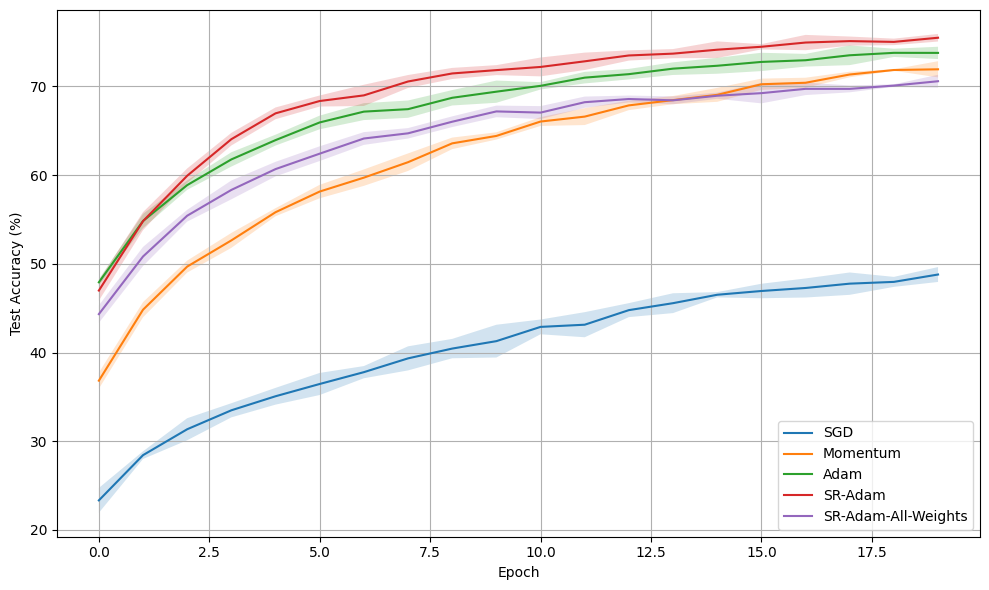

Saved epoch mean/std plot to results\CIFAR10\simplecnn\noise_0.0

=== Dataset: CIFAR10 | Noise: 0.05 ===
Using model: simplecnn
Files already downloaded and verified
Files already downloaded and verified

Optimizer: SGD (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.67it/s]


Epoch 1/20 | Train Loss: 2.2637 | Train Acc: 16.53% | Test Loss: 2.2007 | Test Acc: 23.18% | Time: 29.39s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 10/20 | Train Loss: 1.6928 | Train Acc: 38.94% | Test Loss: 1.6296 | Test Acc: 42.29% | Time: 29.59s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 20/20 | Train Loss: 1.4940 | Train Acc: 45.84% | Test Loss: 1.3924 | Test Acc: 50.28% | Time: 29.56s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SGD\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SGD\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.66it/s]


Epoch 1/20 | Train Loss: 2.2563 | Train Acc: 16.12% | Test Loss: 2.1898 | Test Acc: 23.52% | Time: 29.53s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 10/20 | Train Loss: 1.6998 | Train Acc: 38.86% | Test Loss: 1.6634 | Test Acc: 40.31% | Time: 29.65s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.67it/s]


Epoch 20/20 | Train Loss: 1.5070 | Train Acc: 45.50% | Test Loss: 1.4129 | Test Acc: 49.01% | Time: 29.41s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SGD\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SGD\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 1/20 | Train Loss: 2.2573 | Train Acc: 16.52% | Test Loss: 2.1862 | Test Acc: 21.44% | Time: 29.71s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.67it/s]


Epoch 10/20 | Train Loss: 1.6797 | Train Acc: 39.43% | Test Loss: 1.5861 | Test Acc: 42.58% | Time: 29.43s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 20/20 | Train Loss: 1.5074 | Train Acc: 45.74% | Test Loss: 1.4163 | Test Acc: 48.89% | Time: 29.61s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SGD\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SGD\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 1/20 | Train Loss: 2.2410 | Train Acc: 18.26% | Test Loss: 2.1542 | Test Acc: 25.55% | Time: 29.55s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.66it/s]


Epoch 10/20 | Train Loss: 1.6874 | Train Acc: 39.28% | Test Loss: 1.5818 | Test Acc: 43.18% | Time: 29.53s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 20/20 | Train Loss: 1.4987 | Train Acc: 45.93% | Test Loss: 1.4189 | Test Acc: 49.26% | Time: 29.70s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SGD\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SGD\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.68it/s]


Epoch 1/20 | Train Loss: 2.2506 | Train Acc: 18.28% | Test Loss: 2.1725 | Test Acc: 23.05% | Time: 29.36s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.67it/s]


Epoch 10/20 | Train Loss: 1.6798 | Train Acc: 39.01% | Test Loss: 1.6411 | Test Acc: 41.48% | Time: 29.44s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 20/20 | Train Loss: 1.4939 | Train Acc: 46.13% | Test Loss: 1.4470 | Test Acc: 47.99% | Time: 29.66s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SGD\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SGD\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.05\SGD\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.05\SGD\batch_size_512\runs_and_aggregate.xlsx

Optimizer: Momentum (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 1/20 | Train Loss: 2.0355 | Train Acc: 25.71% | Test Loss: 1.7760 | Test Acc: 35.96% | Time: 29.64s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.67it/s]


Epoch 10/20 | Train Loss: 1.1400 | Train Acc: 59.36% | Test Loss: 1.0378 | Test Acc: 63.97% | Time: 29.49s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.66it/s]


Epoch 20/20 | Train Loss: 0.9067 | Train Acc: 67.92% | Test Loss: 0.8025 | Test Acc: 72.44% | Time: 29.47s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Momentum\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Momentum\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 1/20 | Train Loss: 2.0523 | Train Acc: 25.12% | Test Loss: 1.7920 | Test Acc: 36.55% | Time: 29.58s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 10/20 | Train Loss: 1.1577 | Train Acc: 58.89% | Test Loss: 1.0326 | Test Acc: 63.94% | Time: 29.54s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 20/20 | Train Loss: 0.9332 | Train Acc: 66.82% | Test Loss: 0.8195 | Test Acc: 71.75% | Time: 29.59s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Momentum\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Momentum\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]


Epoch 1/20 | Train Loss: 2.0323 | Train Acc: 26.18% | Test Loss: 1.7423 | Test Acc: 37.54% | Time: 29.75s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 10/20 | Train Loss: 1.1642 | Train Acc: 58.34% | Test Loss: 1.0226 | Test Acc: 64.24% | Time: 29.81s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 20/20 | Train Loss: 0.9205 | Train Acc: 67.37% | Test Loss: 0.7937 | Test Acc: 72.85% | Time: 29.70s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Momentum\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Momentum\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 1/20 | Train Loss: 2.0124 | Train Acc: 26.42% | Test Loss: 1.7630 | Test Acc: 36.22% | Time: 29.58s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 10/20 | Train Loss: 1.1522 | Train Acc: 59.04% | Test Loss: 1.0112 | Test Acc: 64.85% | Time: 29.61s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 20/20 | Train Loss: 0.9166 | Train Acc: 67.54% | Test Loss: 0.8059 | Test Acc: 72.86% | Time: 29.64s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Momentum\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Momentum\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 1/20 | Train Loss: 2.0356 | Train Acc: 25.93% | Test Loss: 1.7434 | Test Acc: 37.74% | Time: 29.70s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 10/20 | Train Loss: 1.1405 | Train Acc: 59.35% | Test Loss: 1.0276 | Test Acc: 63.77% | Time: 29.55s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 20/20 | Train Loss: 0.9265 | Train Acc: 67.05% | Test Loss: 0.8381 | Test Acc: 71.03% | Time: 29.63s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Momentum\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Momentum\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.05\Momentum\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.05\Momentum\batch_size_512\runs_and_aggregate.xlsx

Optimizer: Adam (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 1/20 | Train Loss: 1.7998 | Train Acc: 34.61% | Test Loss: 1.4873 | Test Acc: 46.08% | Time: 29.89s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 10/20 | Train Loss: 1.0094 | Train Acc: 64.40% | Test Loss: 0.8699 | Test Acc: 70.02% | Time: 29.97s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]


Epoch 20/20 | Train Loss: 0.8620 | Train Acc: 69.78% | Test Loss: 0.7561 | Test Acc: 73.96% | Time: 29.72s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 1/20 | Train Loss: 1.7890 | Train Acc: 34.72% | Test Loss: 1.4512 | Test Acc: 48.27% | Time: 29.71s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 10/20 | Train Loss: 1.0272 | Train Acc: 63.53% | Test Loss: 0.8890 | Test Acc: 69.03% | Time: 29.96s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 20/20 | Train Loss: 0.8840 | Train Acc: 68.84% | Test Loss: 0.7859 | Test Acc: 72.45% | Time: 29.64s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 1/20 | Train Loss: 1.7743 | Train Acc: 35.12% | Test Loss: 1.4504 | Test Acc: 47.39% | Time: 29.59s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 10/20 | Train Loss: 1.0062 | Train Acc: 64.19% | Test Loss: 0.8596 | Test Acc: 70.45% | Time: 30.06s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 20/20 | Train Loss: 0.8456 | Train Acc: 70.17% | Test Loss: 0.7402 | Test Acc: 74.70% | Time: 29.65s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]


Epoch 1/20 | Train Loss: 1.7707 | Train Acc: 35.55% | Test Loss: 1.4807 | Test Acc: 47.41% | Time: 29.76s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 10/20 | Train Loss: 1.0287 | Train Acc: 63.56% | Test Loss: 0.8833 | Test Acc: 68.78% | Time: 29.81s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 20/20 | Train Loss: 0.8658 | Train Acc: 69.49% | Test Loss: 0.7601 | Test Acc: 73.61% | Time: 29.68s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 1/20 | Train Loss: 1.7697 | Train Acc: 35.36% | Test Loss: 1.4298 | Test Acc: 48.92% | Time: 29.70s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 10/20 | Train Loss: 1.0258 | Train Acc: 63.57% | Test Loss: 0.9057 | Test Acc: 67.90% | Time: 29.63s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 20/20 | Train Loss: 0.8707 | Train Acc: 69.34% | Test Loss: 0.7775 | Test Acc: 72.99% | Time: 29.73s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 1/20 | Train Loss: 1.8310 | Train Acc: 33.47% | Test Loss: 1.4747 | Test Acc: 47.27% | Time: 30.04s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 10/20 | Train Loss: 0.9458 | Train Acc: 66.64% | Test Loss: 0.8012 | Test Acc: 72.28% | Time: 29.90s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 20/20 | Train Loss: 0.8137 | Train Acc: 71.54% | Test Loss: 0.6982 | Test Acc: 75.90% | Time: 29.94s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 1/20 | Train Loss: 1.8271 | Train Acc: 33.27% | Test Loss: 1.5049 | Test Acc: 45.77% | Time: 29.86s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 10/20 | Train Loss: 0.9269 | Train Acc: 67.46% | Test Loss: 0.7850 | Test Acc: 72.64% | Time: 29.93s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 20/20 | Train Loss: 0.7814 | Train Acc: 72.29% | Test Loss: 0.7021 | Test Acc: 75.94% | Time: 29.94s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 1/20 | Train Loss: 1.8223 | Train Acc: 33.27% | Test Loss: 1.4561 | Test Acc: 47.92% | Time: 29.97s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 10/20 | Train Loss: 0.9129 | Train Acc: 67.63% | Test Loss: 0.8084 | Test Acc: 72.01% | Time: 29.79s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 20/20 | Train Loss: 0.7724 | Train Acc: 72.81% | Test Loss: 0.7053 | Test Acc: 76.20% | Time: 29.98s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 1/20 | Train Loss: 1.7959 | Train Acc: 34.67% | Test Loss: 1.4523 | Test Acc: 47.90% | Time: 29.82s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 10/20 | Train Loss: 0.9359 | Train Acc: 66.94% | Test Loss: 0.8012 | Test Acc: 72.10% | Time: 29.88s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 20/20 | Train Loss: 0.8036 | Train Acc: 71.88% | Test Loss: 0.7122 | Test Acc: 75.39% | Time: 30.09s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 1/20 | Train Loss: 1.8037 | Train Acc: 34.08% | Test Loss: 1.4364 | Test Acc: 48.66% | Time: 29.93s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 10/20 | Train Loss: 0.9360 | Train Acc: 66.86% | Test Loss: 0.8326 | Test Acc: 70.64% | Time: 30.07s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 20/20 | Train Loss: 0.8048 | Train Acc: 71.73% | Test Loss: 0.7208 | Test Acc: 75.34% | Time: 30.00s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam-All-Weights (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 1/20 | Train Loss: 1.8975 | Train Acc: 30.91% | Test Loss: 1.5224 | Test Acc: 44.90% | Time: 29.92s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 10/20 | Train Loss: 1.0669 | Train Acc: 62.37% | Test Loss: 0.9251 | Test Acc: 67.25% | Time: 30.23s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 20/20 | Train Loss: 0.9675 | Train Acc: 66.02% | Test Loss: 0.8500 | Test Acc: 71.04% | Time: 30.17s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 1/20 | Train Loss: 1.9021 | Train Acc: 30.23% | Test Loss: 1.5638 | Test Acc: 43.64% | Time: 29.98s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 10/20 | Train Loss: 1.0750 | Train Acc: 61.92% | Test Loss: 0.9355 | Test Acc: 67.14% | Time: 30.03s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 20/20 | Train Loss: 0.9588 | Train Acc: 66.49% | Test Loss: 0.8459 | Test Acc: 71.03% | Time: 30.17s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 1/20 | Train Loss: 1.8867 | Train Acc: 31.05% | Test Loss: 1.5238 | Test Acc: 44.56% | Time: 30.20s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 10/20 | Train Loss: 1.0570 | Train Acc: 62.95% | Test Loss: 0.9210 | Test Acc: 67.93% | Time: 29.66s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 20/20 | Train Loss: 0.9699 | Train Acc: 66.08% | Test Loss: 0.8567 | Test Acc: 70.57% | Time: 30.07s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 1/20 | Train Loss: 1.8662 | Train Acc: 31.60% | Test Loss: 1.5334 | Test Acc: 43.95% | Time: 30.08s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 10/20 | Train Loss: 1.0980 | Train Acc: 61.13% | Test Loss: 0.9414 | Test Acc: 66.92% | Time: 30.01s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 20/20 | Train Loss: 0.9707 | Train Acc: 65.96% | Test Loss: 0.8494 | Test Acc: 70.42% | Time: 30.13s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 1/20 | Train Loss: 1.8598 | Train Acc: 31.88% | Test Loss: 1.5002 | Test Acc: 45.19% | Time: 30.25s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 10/20 | Train Loss: 1.1000 | Train Acc: 60.88% | Test Loss: 0.9695 | Test Acc: 65.90% | Time: 29.97s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 20/20 | Train Loss: 0.9439 | Train Acc: 67.00% | Test Loss: 0.8258 | Test Acc: 71.79% | Time: 30.10s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\runs_and_aggregate.xlsx
Updated Adam aggregates with statistical test results
Updated SR-Adam aggregates with statistical test results
Updated SR-Adam-All-Weights aggregates with statistical test results


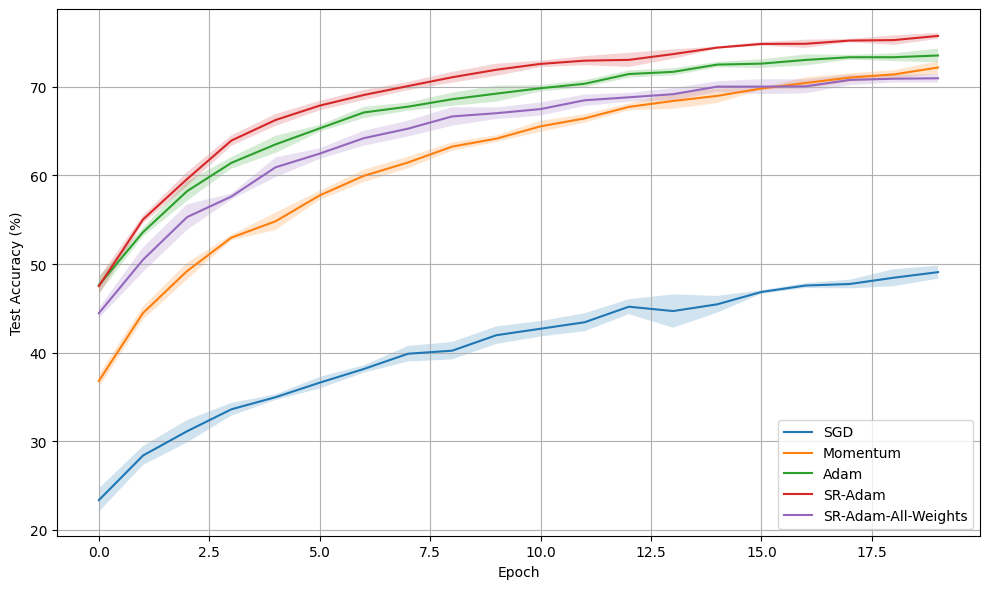

Saved epoch mean/std plot to results\CIFAR10\simplecnn\noise_0.05

=== Dataset: CIFAR10 | Noise: 0.1 ===
Using model: simplecnn
Files already downloaded and verified
Files already downloaded and verified

Optimizer: SGD (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 1/20 | Train Loss: 2.2629 | Train Acc: 16.63% | Test Loss: 2.1992 | Test Acc: 23.20% | Time: 29.78s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 10/20 | Train Loss: 1.6969 | Train Acc: 38.78% | Test Loss: 1.6310 | Test Acc: 42.22% | Time: 29.73s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 20/20 | Train Loss: 1.4983 | Train Acc: 45.72% | Test Loss: 1.3945 | Test Acc: 50.33% | Time: 29.55s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SGD\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SGD\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]


Epoch 1/20 | Train Loss: 2.2555 | Train Acc: 16.20% | Test Loss: 2.1885 | Test Acc: 23.76% | Time: 32.25s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 10/20 | Train Loss: 1.7034 | Train Acc: 38.78% | Test Loss: 1.6599 | Test Acc: 40.46% | Time: 29.65s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.66it/s]


Epoch 20/20 | Train Loss: 1.5105 | Train Acc: 45.40% | Test Loss: 1.4151 | Test Acc: 49.02% | Time: 29.48s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SGD\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SGD\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 1/20 | Train Loss: 2.2567 | Train Acc: 16.60% | Test Loss: 2.1857 | Test Acc: 22.03% | Time: 29.60s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 10/20 | Train Loss: 1.6840 | Train Acc: 39.30% | Test Loss: 1.5876 | Test Acc: 42.49% | Time: 29.64s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.66it/s]


Epoch 20/20 | Train Loss: 1.5123 | Train Acc: 45.58% | Test Loss: 1.4164 | Test Acc: 48.77% | Time: 29.46s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SGD\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SGD\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.66it/s]


Epoch 1/20 | Train Loss: 2.2401 | Train Acc: 18.39% | Test Loss: 2.1529 | Test Acc: 25.61% | Time: 29.47s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 10/20 | Train Loss: 1.6908 | Train Acc: 39.18% | Test Loss: 1.5819 | Test Acc: 43.18% | Time: 29.61s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.66it/s]


Epoch 20/20 | Train Loss: 1.5023 | Train Acc: 45.72% | Test Loss: 1.4173 | Test Acc: 49.17% | Time: 29.49s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SGD\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SGD\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 1/20 | Train Loss: 2.2500 | Train Acc: 18.31% | Test Loss: 2.1719 | Test Acc: 23.20% | Time: 29.56s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 10/20 | Train Loss: 1.6839 | Train Acc: 38.88% | Test Loss: 1.6438 | Test Acc: 41.27% | Time: 29.54s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.66it/s]


Epoch 20/20 | Train Loss: 1.4976 | Train Acc: 45.97% | Test Loss: 1.4457 | Test Acc: 48.24% | Time: 29.53s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SGD\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SGD\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.1\SGD\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.1\SGD\batch_size_512\runs_and_aggregate.xlsx

Optimizer: Momentum (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 1/20 | Train Loss: 2.0369 | Train Acc: 25.60% | Test Loss: 1.7796 | Test Acc: 35.86% | Time: 29.63s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 10/20 | Train Loss: 1.1476 | Train Acc: 58.91% | Test Loss: 1.0350 | Test Acc: 64.00% | Time: 29.69s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 20/20 | Train Loss: 0.9214 | Train Acc: 67.38% | Test Loss: 0.8076 | Test Acc: 72.01% | Time: 29.73s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Momentum\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Momentum\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 1/20 | Train Loss: 2.0506 | Train Acc: 25.17% | Test Loss: 1.7874 | Test Acc: 36.57% | Time: 29.76s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 10/20 | Train Loss: 1.1608 | Train Acc: 58.60% | Test Loss: 1.0365 | Test Acc: 63.61% | Time: 29.65s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 20/20 | Train Loss: 0.9407 | Train Acc: 66.56% | Test Loss: 0.8206 | Test Acc: 71.69% | Time: 29.85s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Momentum\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Momentum\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 1/20 | Train Loss: 2.0323 | Train Acc: 26.27% | Test Loss: 1.7410 | Test Acc: 37.58% | Time: 30.26s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 10/20 | Train Loss: 1.1729 | Train Acc: 58.03% | Test Loss: 1.0328 | Test Acc: 63.83% | Time: 29.60s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]


Epoch 20/20 | Train Loss: 0.9297 | Train Acc: 67.22% | Test Loss: 0.7995 | Test Acc: 72.57% | Time: 29.73s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Momentum\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Momentum\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 1/20 | Train Loss: 2.0132 | Train Acc: 26.49% | Test Loss: 1.7630 | Test Acc: 36.15% | Time: 29.87s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 10/20 | Train Loss: 1.1613 | Train Acc: 58.81% | Test Loss: 1.0279 | Test Acc: 64.30% | Time: 29.67s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 20/20 | Train Loss: 0.9283 | Train Acc: 67.28% | Test Loss: 0.8128 | Test Acc: 72.34% | Time: 29.92s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Momentum\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Momentum\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 1/20 | Train Loss: 2.0363 | Train Acc: 25.97% | Test Loss: 1.7394 | Test Acc: 37.91% | Time: 29.78s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]


Epoch 10/20 | Train Loss: 1.1454 | Train Acc: 59.10% | Test Loss: 1.0273 | Test Acc: 63.65% | Time: 29.55s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 20/20 | Train Loss: 0.9386 | Train Acc: 66.66% | Test Loss: 0.8399 | Test Acc: 70.83% | Time: 29.99s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Momentum\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Momentum\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.1\Momentum\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.1\Momentum\batch_size_512\runs_and_aggregate.xlsx

Optimizer: Adam (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 1/20 | Train Loss: 1.8098 | Train Acc: 34.07% | Test Loss: 1.4877 | Test Acc: 46.70% | Time: 29.77s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 10/20 | Train Loss: 1.0165 | Train Acc: 64.13% | Test Loss: 0.8809 | Test Acc: 69.18% | Time: 29.76s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 20/20 | Train Loss: 0.8701 | Train Acc: 69.35% | Test Loss: 0.7673 | Test Acc: 73.61% | Time: 29.95s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Adam\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Adam\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 1/20 | Train Loss: 1.7895 | Train Acc: 34.74% | Test Loss: 1.4729 | Test Acc: 46.71% | Time: 30.00s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 10/20 | Train Loss: 1.0197 | Train Acc: 63.83% | Test Loss: 0.8693 | Test Acc: 69.51% | Time: 30.09s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]


Epoch 20/20 | Train Loss: 0.8893 | Train Acc: 68.56% | Test Loss: 0.7988 | Test Acc: 71.60% | Time: 31.02s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Adam\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Adam\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]


Epoch 1/20 | Train Loss: 1.7785 | Train Acc: 35.11% | Test Loss: 1.4519 | Test Acc: 47.51% | Time: 31.30s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 10/20 | Train Loss: 1.0250 | Train Acc: 63.47% | Test Loss: 0.8840 | Test Acc: 69.06% | Time: 29.83s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 20/20 | Train Loss: 0.8648 | Train Acc: 69.56% | Test Loss: 0.7709 | Test Acc: 73.33% | Time: 29.89s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Adam\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Adam\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 1/20 | Train Loss: 1.7718 | Train Acc: 35.54% | Test Loss: 1.4562 | Test Acc: 48.34% | Time: 29.92s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]


Epoch 10/20 | Train Loss: 1.0381 | Train Acc: 63.15% | Test Loss: 0.8834 | Test Acc: 68.72% | Time: 30.57s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]


Epoch 20/20 | Train Loss: 0.8738 | Train Acc: 69.30% | Test Loss: 0.7747 | Test Acc: 73.03% | Time: 30.52s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Adam\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Adam\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]


Epoch 1/20 | Train Loss: 1.7827 | Train Acc: 34.87% | Test Loss: 1.4369 | Test Acc: 48.82% | Time: 30.71s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 10/20 | Train Loss: 1.0425 | Train Acc: 62.98% | Test Loss: 0.9126 | Test Acc: 67.45% | Time: 29.64s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 20/20 | Train Loss: 0.8954 | Train Acc: 68.40% | Test Loss: 0.8088 | Test Acc: 71.39% | Time: 30.11s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Adam\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\Adam\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.1\Adam\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.1\Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.52it/s]


Epoch 1/20 | Train Loss: 1.8391 | Train Acc: 32.98% | Test Loss: 1.4811 | Test Acc: 46.52% | Time: 30.61s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]


Epoch 10/20 | Train Loss: 0.9612 | Train Acc: 66.12% | Test Loss: 0.8153 | Test Acc: 71.99% | Time: 30.99s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]


Epoch 20/20 | Train Loss: 0.8226 | Train Acc: 71.09% | Test Loss: 0.7015 | Test Acc: 75.79% | Time: 30.38s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 1/20 | Train Loss: 1.8307 | Train Acc: 33.32% | Test Loss: 1.5111 | Test Acc: 46.42% | Time: 29.97s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 10/20 | Train Loss: 0.9315 | Train Acc: 67.24% | Test Loss: 0.7982 | Test Acc: 72.05% | Time: 30.29s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 20/20 | Train Loss: 0.7960 | Train Acc: 72.11% | Test Loss: 0.7337 | Test Acc: 74.86% | Time: 29.75s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]


Epoch 1/20 | Train Loss: 1.8130 | Train Acc: 33.71% | Test Loss: 1.4454 | Test Acc: 48.48% | Time: 30.47s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]


Epoch 10/20 | Train Loss: 0.9169 | Train Acc: 67.54% | Test Loss: 0.8064 | Test Acc: 71.63% | Time: 30.35s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]


Epoch 20/20 | Train Loss: 0.7749 | Train Acc: 72.62% | Test Loss: 0.7021 | Test Acc: 75.86% | Time: 31.63s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]


Epoch 1/20 | Train Loss: 1.7998 | Train Acc: 34.55% | Test Loss: 1.4566 | Test Acc: 48.21% | Time: 30.97s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 10/20 | Train Loss: 0.9515 | Train Acc: 66.61% | Test Loss: 0.8286 | Test Acc: 70.79% | Time: 30.28s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]


Epoch 20/20 | Train Loss: 0.8207 | Train Acc: 71.19% | Test Loss: 0.7087 | Test Acc: 75.36% | Time: 30.42s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.50it/s]


Epoch 1/20 | Train Loss: 1.8197 | Train Acc: 33.40% | Test Loss: 1.4541 | Test Acc: 48.00% | Time: 30.71s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 10/20 | Train Loss: 0.9746 | Train Acc: 65.46% | Test Loss: 0.8641 | Test Acc: 70.09% | Time: 29.77s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]


Epoch 20/20 | Train Loss: 0.8339 | Train Acc: 70.59% | Test Loss: 0.7398 | Test Acc: 74.18% | Time: 30.39s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.1\SR-Adam\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.1\SR-Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam-All-Weights (batch_size: 512)

Run 1/5 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]


Epoch 1/20 | Train Loss: 1.9170 | Train Acc: 30.20% | Test Loss: 1.5357 | Test Acc: 43.07% | Time: 30.52s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.43it/s]


Epoch 10/20 | Train Loss: 1.1056 | Train Acc: 60.95% | Test Loss: 0.9657 | Test Acc: 66.22% | Time: 31.34s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]


Epoch 20/20 | Train Loss: 0.9969 | Train Acc: 65.03% | Test Loss: 0.8712 | Test Acc: 69.96% | Time: 30.66s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]


Epoch 1/20 | Train Loss: 1.9002 | Train Acc: 30.44% | Test Loss: 1.5755 | Test Acc: 41.70% | Time: 30.68s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]


Epoch 10/20 | Train Loss: 1.0966 | Train Acc: 61.39% | Test Loss: 0.9706 | Test Acc: 66.12% | Time: 30.44s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 20/20 | Train Loss: 0.9884 | Train Acc: 65.71% | Test Loss: 0.8506 | Test Acc: 70.64% | Time: 30.05s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 1/20 | Train Loss: 1.8701 | Train Acc: 31.64% | Test Loss: 1.4991 | Test Acc: 45.14% | Time: 30.10s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]


Epoch 10/20 | Train Loss: 1.0640 | Train Acc: 62.29% | Test Loss: 0.9665 | Test Acc: 66.83% | Time: 31.06s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]


Epoch 20/20 | Train Loss: 0.9538 | Train Acc: 66.82% | Test Loss: 0.8470 | Test Acc: 70.75% | Time: 30.37s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]


Epoch 1/20 | Train Loss: 1.8610 | Train Acc: 31.75% | Test Loss: 1.5388 | Test Acc: 44.56% | Time: 30.40s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 10/20 | Train Loss: 1.1033 | Train Acc: 61.06% | Test Loss: 1.0121 | Test Acc: 64.79% | Time: 29.89s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 20/20 | Train Loss: 0.9944 | Train Acc: 65.16% | Test Loss: 0.8780 | Test Acc: 69.60% | Time: 30.27s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 1/20 | Train Loss: 1.8791 | Train Acc: 31.24% | Test Loss: 1.5002 | Test Acc: 45.72% | Time: 30.23s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 10/20 | Train Loss: 1.1241 | Train Acc: 59.83% | Test Loss: 0.9919 | Test Acc: 65.02% | Time: 30.07s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 20/20 | Train Loss: 0.9707 | Train Acc: 65.73% | Test Loss: 0.8456 | Test Acc: 70.60% | Time: 30.04s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\runs_and_aggregate.xlsx
Updated Adam aggregates with statistical test results
Updated SR-Adam aggregates with statistical test results
Updated SR-Adam-All-Weights aggregates with statistical test results


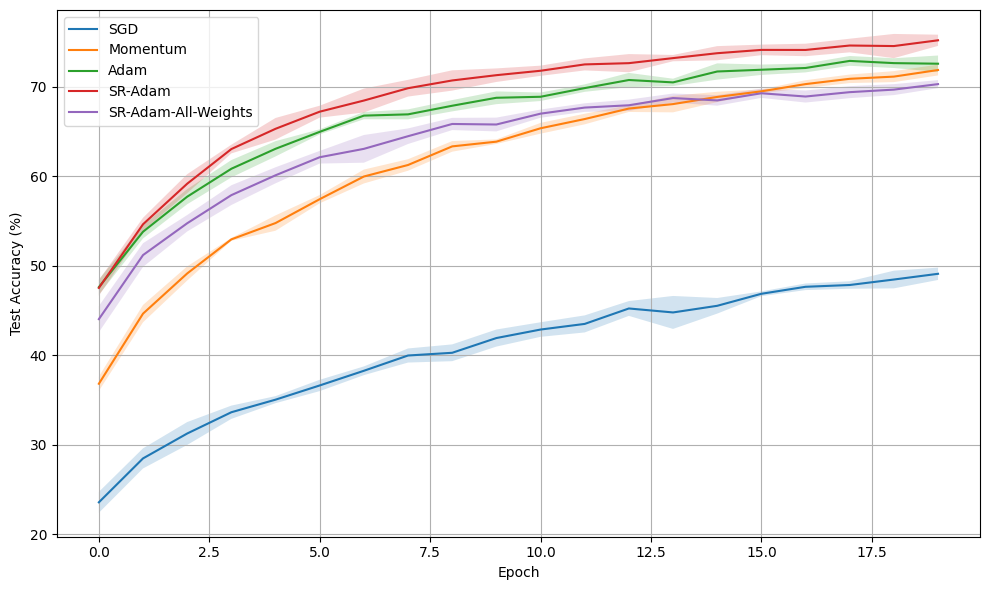

Saved epoch mean/std plot to results\CIFAR10\simplecnn\noise_0.1

=== Dataset: CIFAR100 | Noise: 0.0 ===
Using model: simplecnn
Files already downloaded and verified
Files already downloaded and verified

Optimizer: SGD (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 1/20 | Train Loss: 4.6034 | Train Acc: 1.15% | Test Loss: 4.5968 | Test Acc: 1.30% | Time: 26.74s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.12it/s]


Epoch 10/20 | Train Loss: 4.2026 | Train Acc: 6.29% | Test Loss: 4.1092 | Test Acc: 7.98% | Time: 26.50s


Epoch 20/20: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]


Epoch 20/20 | Train Loss: 3.8732 | Train Acc: 11.12% | Test Loss: 3.7704 | Test Acc: 13.18% | Time: 26.68s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SGD\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SGD\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:23<00:00,  4.13it/s]


Epoch 1/20 | Train Loss: 4.6027 | Train Acc: 1.04% | Test Loss: 4.5964 | Test Acc: 1.36% | Time: 26.46s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


Epoch 10/20 | Train Loss: 4.2297 | Train Acc: 6.26% | Test Loss: 4.1240 | Test Acc: 7.81% | Time: 26.70s


Epoch 20/20: 100%|██████████| 98/98 [00:23<00:00,  4.13it/s]


Epoch 20/20 | Train Loss: 3.9216 | Train Acc: 10.39% | Test Loss: 3.7960 | Test Acc: 12.96% | Time: 26.48s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SGD\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SGD\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:23<00:00,  4.11it/s]


Epoch 1/20 | Train Loss: 4.6023 | Train Acc: 1.21% | Test Loss: 4.5953 | Test Acc: 1.70% | Time: 26.53s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.11it/s]


Epoch 10/20 | Train Loss: 4.2353 | Train Acc: 6.08% | Test Loss: 4.1405 | Test Acc: 7.79% | Time: 26.56s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]


Epoch 20/20 | Train Loss: 3.9031 | Train Acc: 10.77% | Test Loss: 3.7882 | Test Acc: 13.04% | Time: 30.69s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SGD\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SGD\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.68it/s]


Epoch 1/20 | Train Loss: 4.6037 | Train Acc: 1.00% | Test Loss: 4.5961 | Test Acc: 1.18% | Time: 29.66s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]


Epoch 10/20 | Train Loss: 4.2394 | Train Acc: 6.25% | Test Loss: 4.1263 | Test Acc: 8.38% | Time: 29.94s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 20/20 | Train Loss: 3.9162 | Train Acc: 10.28% | Test Loss: 3.7957 | Test Acc: 13.06% | Time: 30.05s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SGD\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SGD\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 1/20 | Train Loss: 4.6011 | Train Acc: 1.27% | Test Loss: 4.5939 | Test Acc: 1.55% | Time: 30.34s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 10/20 | Train Loss: 4.1851 | Train Acc: 6.36% | Test Loss: 4.0756 | Test Acc: 8.97% | Time: 30.19s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 20/20 | Train Loss: 3.8825 | Train Acc: 10.85% | Test Loss: 3.7660 | Test Acc: 13.59% | Time: 30.24s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SGD\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SGD\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.0\SGD\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.0\SGD\batch_size_512\runs_and_aggregate.xlsx

Optimizer: Momentum (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 1/20 | Train Loss: 4.5503 | Train Acc: 2.06% | Test Loss: 4.3579 | Test Acc: 5.22% | Time: 30.15s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 10/20 | Train Loss: 3.2480 | Train Acc: 21.02% | Test Loss: 3.0754 | Test Acc: 24.58% | Time: 30.26s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 20/20 | Train Loss: 2.8080 | Train Acc: 29.44% | Test Loss: 2.5918 | Test Acc: 34.56% | Time: 29.95s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Momentum\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Momentum\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 1/20 | Train Loss: 4.5493 | Train Acc: 2.19% | Test Loss: 4.3799 | Test Acc: 4.38% | Time: 30.26s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 10/20 | Train Loss: 3.2896 | Train Acc: 20.53% | Test Loss: 3.0880 | Test Acc: 24.72% | Time: 30.40s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 20/20 | Train Loss: 2.8784 | Train Acc: 27.94% | Test Loss: 2.6269 | Test Acc: 33.76% | Time: 30.32s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Momentum\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Momentum\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 1/20 | Train Loss: 4.5505 | Train Acc: 2.35% | Test Loss: 4.3821 | Test Acc: 5.02% | Time: 30.24s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 10/20 | Train Loss: 3.2466 | Train Acc: 20.95% | Test Loss: 3.0685 | Test Acc: 25.43% | Time: 29.99s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.72it/s]


Epoch 20/20 | Train Loss: 2.7910 | Train Acc: 29.88% | Test Loss: 2.5365 | Test Acc: 35.76% | Time: 29.45s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Momentum\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Momentum\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.69it/s]


Epoch 1/20 | Train Loss: 4.5600 | Train Acc: 2.17% | Test Loss: 4.4145 | Test Acc: 4.98% | Time: 29.50s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]


Epoch 10/20 | Train Loss: 3.2508 | Train Acc: 21.42% | Test Loss: 3.0498 | Test Acc: 25.27% | Time: 29.61s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.68it/s]


Epoch 20/20 | Train Loss: 2.8312 | Train Acc: 29.06% | Test Loss: 2.5739 | Test Acc: 34.79% | Time: 29.63s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Momentum\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Momentum\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.66it/s]


Epoch 1/20 | Train Loss: 4.5342 | Train Acc: 2.47% | Test Loss: 4.3025 | Test Acc: 6.46% | Time: 29.73s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]


Epoch 10/20 | Train Loss: 3.2237 | Train Acc: 21.54% | Test Loss: 3.0116 | Test Acc: 26.50% | Time: 31.82s


Epoch 20/20: 100%|██████████| 98/98 [00:23<00:00,  4.14it/s]


Epoch 20/20 | Train Loss: 2.8210 | Train Acc: 29.03% | Test Loss: 2.5627 | Test Acc: 34.93% | Time: 26.36s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Momentum\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Momentum\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.0\Momentum\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.0\Momentum\batch_size_512\runs_and_aggregate.xlsx

Optimizer: Adam (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]


Epoch 1/20 | Train Loss: 4.1686 | Train Acc: 6.56% | Test Loss: 3.6941 | Test Acc: 14.38% | Time: 26.62s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.11it/s]


Epoch 10/20 | Train Loss: 2.7918 | Train Acc: 29.52% | Test Loss: 2.5148 | Test Acc: 35.51% | Time: 26.56s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]


Epoch 20/20 | Train Loss: 2.5291 | Train Acc: 34.72% | Test Loss: 2.2695 | Test Acc: 40.83% | Time: 26.79s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Adam\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Adam\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 1/20 | Train Loss: 4.1695 | Train Acc: 6.86% | Test Loss: 3.6994 | Test Acc: 13.82% | Time: 26.71s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.11it/s]


Epoch 10/20 | Train Loss: 2.8155 | Train Acc: 29.05% | Test Loss: 2.5233 | Test Acc: 35.10% | Time: 26.54s


Epoch 20/20: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


Epoch 20/20 | Train Loss: 2.5353 | Train Acc: 34.65% | Test Loss: 2.2842 | Test Acc: 40.64% | Time: 26.64s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Adam\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Adam\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


Epoch 1/20 | Train Loss: 4.1577 | Train Acc: 6.89% | Test Loss: 3.7029 | Test Acc: 14.44% | Time: 26.66s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]


Epoch 10/20 | Train Loss: 2.7577 | Train Acc: 30.28% | Test Loss: 2.4926 | Test Acc: 36.24% | Time: 26.60s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]


Epoch 20/20 | Train Loss: 2.4969 | Train Acc: 35.82% | Test Loss: 2.2288 | Test Acc: 41.85% | Time: 26.89s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Adam\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Adam\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 1/20 | Train Loss: 4.1928 | Train Acc: 6.54% | Test Loss: 3.7131 | Test Acc: 14.26% | Time: 26.73s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]


Epoch 10/20 | Train Loss: 2.8461 | Train Acc: 28.53% | Test Loss: 2.5472 | Test Acc: 34.97% | Time: 26.59s


Epoch 20/20: 100%|██████████| 98/98 [00:23<00:00,  4.12it/s]


Epoch 20/20 | Train Loss: 2.5810 | Train Acc: 33.67% | Test Loss: 2.3248 | Test Acc: 40.15% | Time: 26.50s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Adam\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Adam\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:23<00:00,  4.11it/s]


Epoch 1/20 | Train Loss: 4.1649 | Train Acc: 6.67% | Test Loss: 3.7260 | Test Acc: 12.75% | Time: 26.57s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.12it/s]


Epoch 10/20 | Train Loss: 2.8117 | Train Acc: 29.06% | Test Loss: 2.5455 | Test Acc: 35.84% | Time: 26.47s


Epoch 20/20: 100%|██████████| 98/98 [00:23<00:00,  4.11it/s]


Epoch 20/20 | Train Loss: 2.5556 | Train Acc: 34.14% | Test Loss: 2.2936 | Test Acc: 40.65% | Time: 26.54s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Adam\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\Adam\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.0\Adam\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.0\Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 1/20 | Train Loss: 4.2020 | Train Acc: 6.21% | Test Loss: 3.7495 | Test Acc: 13.35% | Time: 26.73s


Epoch 10/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 10/20 | Train Loss: 2.6482 | Train Acc: 32.30% | Test Loss: 2.3548 | Test Acc: 38.72% | Time: 26.69s


Epoch 20/20: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]


Epoch 20/20 | Train Loss: 2.4088 | Train Acc: 37.21% | Test Loss: 2.1845 | Test Acc: 43.20% | Time: 26.62s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]


Epoch 1/20 | Train Loss: 4.2010 | Train Acc: 6.47% | Test Loss: 3.7484 | Test Acc: 12.52% | Time: 26.79s


Epoch 10/20: 100%|██████████| 98/98 [00:24<00:00,  4.06it/s]


Epoch 10/20 | Train Loss: 2.6950 | Train Acc: 31.36% | Test Loss: 2.4220 | Test Acc: 36.87% | Time: 26.82s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]


Epoch 20/20 | Train Loss: 2.4479 | Train Acc: 36.53% | Test Loss: 2.1753 | Test Acc: 42.99% | Time: 26.77s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


Epoch 1/20 | Train Loss: 4.1884 | Train Acc: 6.59% | Test Loss: 3.7330 | Test Acc: 13.24% | Time: 26.66s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]


Epoch 10/20 | Train Loss: 2.6218 | Train Acc: 32.96% | Test Loss: 2.3582 | Test Acc: 38.90% | Time: 26.63s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]


Epoch 20/20 | Train Loss: 2.3621 | Train Acc: 38.35% | Test Loss: 2.1292 | Test Acc: 44.13% | Time: 26.89s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


Epoch 1/20 | Train Loss: 4.2220 | Train Acc: 6.06% | Test Loss: 3.7475 | Test Acc: 13.56% | Time: 26.69s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]


Epoch 10/20 | Train Loss: 2.7513 | Train Acc: 30.17% | Test Loss: 2.4692 | Test Acc: 35.96% | Time: 26.62s


Epoch 20/20: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]


Epoch 20/20 | Train Loss: 2.5121 | Train Acc: 35.07% | Test Loss: 2.2423 | Test Acc: 40.83% | Time: 26.67s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 1/20 | Train Loss: 4.1942 | Train Acc: 6.29% | Test Loss: 3.7555 | Test Acc: 13.01% | Time: 26.74s


Epoch 10/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 10/20 | Train Loss: 2.7014 | Train Acc: 31.28% | Test Loss: 2.4258 | Test Acc: 37.93% | Time: 26.75s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]


Epoch 20/20 | Train Loss: 2.4478 | Train Acc: 36.29% | Test Loss: 2.1929 | Test Acc: 42.54% | Time: 26.91s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.0\SR-Adam\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.0\SR-Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam-All-Weights (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]


Epoch 1/20 | Train Loss: 4.2597 | Train Acc: 5.45% | Test Loss: 3.8407 | Test Acc: 11.25% | Time: 26.75s


Epoch 10/20: 100%|██████████| 98/98 [00:24<00:00,  4.06it/s]


Epoch 10/20 | Train Loss: 2.9476 | Train Acc: 25.98% | Test Loss: 2.6391 | Test Acc: 32.48% | Time: 26.81s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  4.06it/s]


Epoch 20/20 | Train Loss: 2.7794 | Train Acc: 29.16% | Test Loss: 2.5426 | Test Acc: 35.16% | Time: 26.84s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]


Epoch 1/20 | Train Loss: 4.2488 | Train Acc: 5.83% | Test Loss: 3.7992 | Test Acc: 11.77% | Time: 27.11s


Epoch 10/20: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]


Epoch 10/20 | Train Loss: 3.0026 | Train Acc: 25.11% | Test Loss: 2.7653 | Test Acc: 30.23% | Time: 26.92s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 20/20 | Train Loss: 2.8196 | Train Acc: 28.83% | Test Loss: 2.5741 | Test Acc: 33.86% | Time: 26.73s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 1/20 | Train Loss: 4.2304 | Train Acc: 5.89% | Test Loss: 3.8141 | Test Acc: 12.03% | Time: 26.75s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]


Epoch 10/20 | Train Loss: 2.9512 | Train Acc: 26.15% | Test Loss: 2.6986 | Test Acc: 32.18% | Time: 26.60s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 20/20 | Train Loss: 2.7707 | Train Acc: 29.83% | Test Loss: 2.5226 | Test Acc: 35.60% | Time: 26.73s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]


Epoch 1/20 | Train Loss: 4.2759 | Train Acc: 5.25% | Test Loss: 3.8469 | Test Acc: 11.16% | Time: 26.73s


Epoch 10/20: 100%|██████████| 98/98 [00:23<00:00,  4.08it/s]


Epoch 10/20 | Train Loss: 3.0132 | Train Acc: 24.71% | Test Loss: 2.7598 | Test Acc: 30.72% | Time: 26.70s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]


Epoch 20/20 | Train Loss: 2.8118 | Train Acc: 28.61% | Test Loss: 2.5662 | Test Acc: 34.32% | Time: 26.79s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:24<00:00,  4.06it/s]


Epoch 1/20 | Train Loss: 4.2521 | Train Acc: 5.41% | Test Loss: 3.8601 | Test Acc: 11.68% | Time: 26.86s


Epoch 10/20: 100%|██████████| 98/98 [00:24<00:00,  4.03it/s]


Epoch 10/20 | Train Loss: 2.9970 | Train Acc: 25.11% | Test Loss: 2.7372 | Test Acc: 30.59% | Time: 26.97s


Epoch 20/20: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]


Epoch 20/20 | Train Loss: 2.8080 | Train Acc: 29.09% | Test Loss: 2.5586 | Test Acc: 34.47% | Time: 26.95s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.0\SR-Adam-All-Weights\batch_size_512\runs_and_aggregate.xlsx
Updated Adam aggregates with statistical test results
Updated SR-Adam aggregates with statistical test results
Updated SR-Adam-All-Weights aggregates with statistical test results


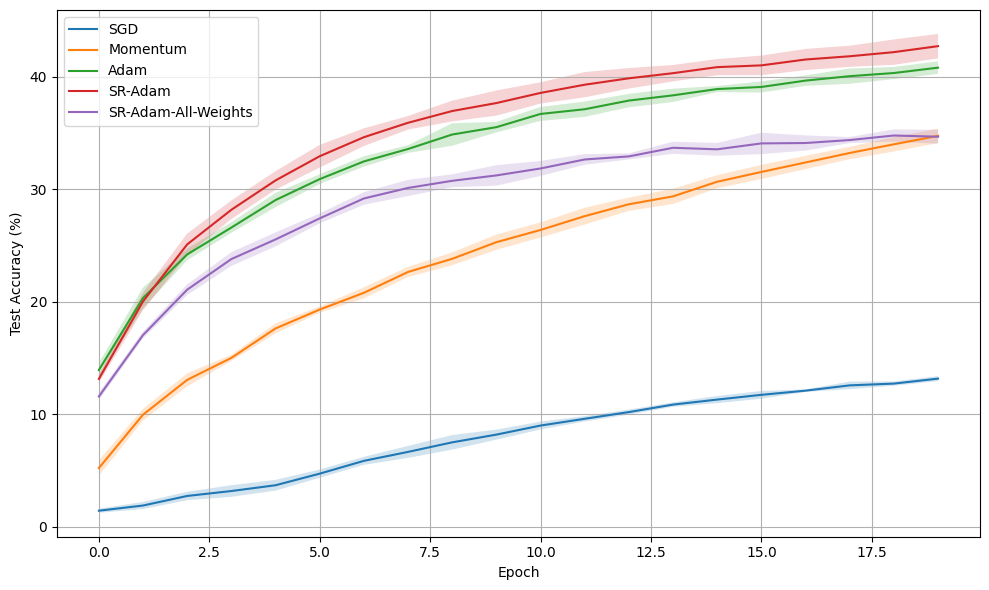

Saved epoch mean/std plot to results\CIFAR100\simplecnn\noise_0.0

=== Dataset: CIFAR100 | Noise: 0.05 ===
Using model: simplecnn
Files already downloaded and verified
Files already downloaded and verified

Optimizer: SGD (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 1/20 | Train Loss: 4.6033 | Train Acc: 1.14% | Test Loss: 4.5966 | Test Acc: 1.22% | Time: 29.75s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 10/20 | Train Loss: 4.2117 | Train Acc: 5.98% | Test Loss: 4.1190 | Test Acc: 7.66% | Time: 29.75s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 20/20 | Train Loss: 3.8844 | Train Acc: 10.68% | Test Loss: 3.7689 | Test Acc: 13.28% | Time: 29.66s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SGD\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SGD\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 1/20 | Train Loss: 4.6026 | Train Acc: 1.13% | Test Loss: 4.5963 | Test Acc: 1.36% | Time: 29.63s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 10/20 | Train Loss: 4.2227 | Train Acc: 6.47% | Test Loss: 4.1165 | Test Acc: 8.57% | Time: 29.78s


Epoch 20/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 20/20 | Train Loss: 3.9211 | Train Acc: 10.43% | Test Loss: 3.8047 | Test Acc: 12.57% | Time: 29.62s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SGD\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SGD\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 1/20 | Train Loss: 4.6024 | Train Acc: 1.22% | Test Loss: 4.5954 | Test Acc: 1.71% | Time: 29.69s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 10/20 | Train Loss: 4.2301 | Train Acc: 6.20% | Test Loss: 4.1323 | Test Acc: 7.61% | Time: 30.01s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 20/20 | Train Loss: 3.8931 | Train Acc: 10.65% | Test Loss: 3.7751 | Test Acc: 13.85% | Time: 29.88s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SGD\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SGD\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 1/20 | Train Loss: 4.6034 | Train Acc: 0.97% | Test Loss: 4.5961 | Test Acc: 1.12% | Time: 29.84s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 10/20 | Train Loss: 4.2253 | Train Acc: 6.18% | Test Loss: 4.1087 | Test Acc: 8.05% | Time: 30.08s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]


Epoch 20/20 | Train Loss: 3.9137 | Train Acc: 10.28% | Test Loss: 3.7930 | Test Acc: 12.88% | Time: 29.72s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SGD\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SGD\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 1/20 | Train Loss: 4.6013 | Train Acc: 1.27% | Test Loss: 4.5939 | Test Acc: 1.61% | Time: 29.69s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 10/20 | Train Loss: 4.1904 | Train Acc: 6.35% | Test Loss: 4.0800 | Test Acc: 8.73% | Time: 29.58s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]


Epoch 20/20 | Train Loss: 3.8905 | Train Acc: 10.88% | Test Loss: 3.7758 | Test Acc: 13.42% | Time: 29.73s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SGD\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SGD\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.05\SGD\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.05\SGD\batch_size_512\runs_and_aggregate.xlsx

Optimizer: Momentum (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 1/20 | Train Loss: 4.5514 | Train Acc: 2.09% | Test Loss: 4.3640 | Test Acc: 5.03% | Time: 29.88s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 10/20 | Train Loss: 3.2569 | Train Acc: 20.94% | Test Loss: 3.0611 | Test Acc: 25.63% | Time: 29.73s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 20/20 | Train Loss: 2.8411 | Train Acc: 28.66% | Test Loss: 2.5808 | Test Acc: 34.96% | Time: 29.90s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Momentum\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Momentum\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 1/20 | Train Loss: 4.5498 | Train Acc: 2.29% | Test Loss: 4.3778 | Test Acc: 4.87% | Time: 29.75s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 10/20 | Train Loss: 3.2947 | Train Acc: 20.19% | Test Loss: 3.1147 | Test Acc: 24.29% | Time: 30.08s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 20/20 | Train Loss: 2.8944 | Train Acc: 27.61% | Test Loss: 2.6312 | Test Acc: 33.42% | Time: 30.03s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Momentum\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Momentum\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 1/20 | Train Loss: 4.5491 | Train Acc: 2.28% | Test Loss: 4.3800 | Test Acc: 4.73% | Time: 29.61s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 10/20 | Train Loss: 3.2630 | Train Acc: 20.74% | Test Loss: 3.0808 | Test Acc: 25.00% | Time: 29.74s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 20/20 | Train Loss: 2.8147 | Train Acc: 28.99% | Test Loss: 2.5730 | Test Acc: 34.99% | Time: 30.00s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Momentum\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Momentum\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 1/20 | Train Loss: 4.5588 | Train Acc: 2.16% | Test Loss: 4.4066 | Test Acc: 5.77% | Time: 29.70s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 10/20 | Train Loss: 3.2499 | Train Acc: 21.13% | Test Loss: 3.0682 | Test Acc: 25.40% | Time: 29.75s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 20/20 | Train Loss: 2.8476 | Train Acc: 28.50% | Test Loss: 2.5749 | Test Acc: 34.47% | Time: 29.75s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Momentum\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Momentum\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 1/20 | Train Loss: 4.5330 | Train Acc: 2.55% | Test Loss: 4.2986 | Test Acc: 5.89% | Time: 29.80s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 10/20 | Train Loss: 3.2293 | Train Acc: 21.54% | Test Loss: 3.0204 | Test Acc: 25.98% | Time: 29.62s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 20/20 | Train Loss: 2.8326 | Train Acc: 28.90% | Test Loss: 2.5625 | Test Acc: 35.32% | Time: 29.95s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Momentum\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Momentum\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.05\Momentum\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.05\Momentum\batch_size_512\runs_and_aggregate.xlsx

Optimizer: Adam (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 1/20 | Train Loss: 4.1969 | Train Acc: 6.09% | Test Loss: 3.7319 | Test Acc: 13.71% | Time: 29.82s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 10/20 | Train Loss: 2.8296 | Train Acc: 28.68% | Test Loss: 2.5274 | Test Acc: 35.75% | Time: 30.21s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 20/20 | Train Loss: 2.5820 | Train Acc: 33.68% | Test Loss: 2.3231 | Test Acc: 39.78% | Time: 30.18s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Adam\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Adam\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 1/20 | Train Loss: 4.1780 | Train Acc: 6.73% | Test Loss: 3.7044 | Test Acc: 14.49% | Time: 29.98s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 10/20 | Train Loss: 2.8630 | Train Acc: 28.21% | Test Loss: 2.5908 | Test Acc: 34.67% | Time: 30.09s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 20/20 | Train Loss: 2.5866 | Train Acc: 33.76% | Test Loss: 2.3111 | Test Acc: 39.98% | Time: 30.01s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Adam\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Adam\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 1/20 | Train Loss: 4.1817 | Train Acc: 6.64% | Test Loss: 3.7090 | Test Acc: 14.29% | Time: 29.83s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 10/20 | Train Loss: 2.8096 | Train Acc: 29.21% | Test Loss: 2.5431 | Test Acc: 35.74% | Time: 29.95s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 20/20 | Train Loss: 2.5541 | Train Acc: 34.17% | Test Loss: 2.2873 | Test Acc: 40.77% | Time: 30.04s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Adam\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Adam\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 1/20 | Train Loss: 4.1878 | Train Acc: 6.44% | Test Loss: 3.7145 | Test Acc: 14.31% | Time: 29.98s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 10/20 | Train Loss: 2.8467 | Train Acc: 28.49% | Test Loss: 2.5808 | Test Acc: 34.46% | Time: 29.80s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 20/20 | Train Loss: 2.6015 | Train Acc: 33.42% | Test Loss: 2.3340 | Test Acc: 39.42% | Time: 29.93s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Adam\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Adam\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 1/20 | Train Loss: 4.1580 | Train Acc: 6.99% | Test Loss: 3.7069 | Test Acc: 13.92% | Time: 29.99s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 10/20 | Train Loss: 2.7961 | Train Acc: 29.75% | Test Loss: 2.4965 | Test Acc: 36.37% | Time: 30.08s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 20/20 | Train Loss: 2.5283 | Train Acc: 34.96% | Test Loss: 2.2949 | Test Acc: 41.01% | Time: 30.15s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Adam\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\Adam\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.05\Adam\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.05\Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 1/20 | Train Loss: 4.2134 | Train Acc: 5.89% | Test Loss: 3.7631 | Test Acc: 13.06% | Time: 29.87s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 10/20 | Train Loss: 2.7007 | Train Acc: 31.24% | Test Loss: 2.4299 | Test Acc: 37.61% | Time: 30.05s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 20/20 | Train Loss: 2.4595 | Train Acc: 36.03% | Test Loss: 2.1988 | Test Acc: 42.50% | Time: 30.04s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 1/20 | Train Loss: 4.2251 | Train Acc: 5.99% | Test Loss: 3.7709 | Test Acc: 12.87% | Time: 30.11s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 10/20 | Train Loss: 2.7970 | Train Acc: 29.29% | Test Loss: 2.5200 | Test Acc: 34.93% | Time: 30.25s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 20/20 | Train Loss: 2.5583 | Train Acc: 34.17% | Test Loss: 2.2991 | Test Acc: 40.07% | Time: 30.12s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 1/20 | Train Loss: 4.2109 | Train Acc: 6.29% | Test Loss: 3.7385 | Test Acc: 13.76% | Time: 29.94s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 10/20 | Train Loss: 2.7224 | Train Acc: 30.66% | Test Loss: 2.4328 | Test Acc: 37.44% | Time: 30.01s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 20/20 | Train Loss: 2.4858 | Train Acc: 35.46% | Test Loss: 2.2348 | Test Acc: 40.98% | Time: 30.02s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 1/20 | Train Loss: 4.2204 | Train Acc: 6.06% | Test Loss: 3.7363 | Test Acc: 13.52% | Time: 29.95s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 10/20 | Train Loss: 2.7823 | Train Acc: 29.54% | Test Loss: 2.4795 | Test Acc: 36.43% | Time: 30.28s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 20/20 | Train Loss: 2.5311 | Train Acc: 34.74% | Test Loss: 2.2757 | Test Acc: 40.65% | Time: 30.04s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 1/20 | Train Loss: 4.1826 | Train Acc: 6.54% | Test Loss: 3.7303 | Test Acc: 13.44% | Time: 29.92s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 10/20 | Train Loss: 2.6509 | Train Acc: 32.42% | Test Loss: 2.3775 | Test Acc: 38.77% | Time: 30.18s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 20/20 | Train Loss: 2.3887 | Train Acc: 37.75% | Test Loss: 2.1534 | Test Acc: 43.29% | Time: 30.14s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.05\SR-Adam\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.05\SR-Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam-All-Weights (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]


Epoch 1/20 | Train Loss: 4.2593 | Train Acc: 5.15% | Test Loss: 3.8410 | Test Acc: 11.63% | Time: 30.40s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 10/20 | Train Loss: 3.0187 | Train Acc: 24.84% | Test Loss: 2.7509 | Test Acc: 30.88% | Time: 30.20s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 20/20 | Train Loss: 2.8357 | Train Acc: 28.23% | Test Loss: 2.5753 | Test Acc: 34.18% | Time: 30.25s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 1/20 | Train Loss: 4.2745 | Train Acc: 5.32% | Test Loss: 3.8839 | Test Acc: 10.75% | Time: 30.12s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.37it/s]


Epoch 10/20 | Train Loss: 3.0609 | Train Acc: 23.99% | Test Loss: 2.7974 | Test Acc: 29.79% | Time: 31.87s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]


Epoch 20/20 | Train Loss: 2.8641 | Train Acc: 27.51% | Test Loss: 2.6518 | Test Acc: 32.47% | Time: 30.85s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]


Epoch 1/20 | Train Loss: 4.2648 | Train Acc: 5.50% | Test Loss: 3.8322 | Test Acc: 11.72% | Time: 30.46s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.50it/s]


Epoch 10/20 | Train Loss: 3.0077 | Train Acc: 25.04% | Test Loss: 2.6990 | Test Acc: 31.39% | Time: 30.74s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 20/20 | Train Loss: 2.8000 | Train Acc: 28.78% | Test Loss: 2.5547 | Test Acc: 34.32% | Time: 30.19s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 1/20 | Train Loss: 4.2886 | Train Acc: 5.06% | Test Loss: 3.8717 | Test Acc: 10.78% | Time: 29.95s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]


Epoch 10/20 | Train Loss: 3.0518 | Train Acc: 23.94% | Test Loss: 2.7954 | Test Acc: 30.18% | Time: 30.63s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]


Epoch 20/20 | Train Loss: 2.8513 | Train Acc: 28.08% | Test Loss: 2.5936 | Test Acc: 33.37% | Time: 30.37s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]


Epoch 1/20 | Train Loss: 4.2590 | Train Acc: 5.33% | Test Loss: 3.8504 | Test Acc: 11.28% | Time: 30.99s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]


Epoch 10/20 | Train Loss: 3.0305 | Train Acc: 24.77% | Test Loss: 2.7804 | Test Acc: 29.65% | Time: 30.67s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]


Epoch 20/20 | Train Loss: 2.8579 | Train Acc: 28.20% | Test Loss: 2.5845 | Test Acc: 33.77% | Time: 30.93s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.05\SR-Adam-All-Weights\batch_size_512\runs_and_aggregate.xlsx
Updated Adam aggregates with statistical test results
Updated SR-Adam aggregates with statistical test results
Updated SR-Adam-All-Weights aggregates with statistical test results


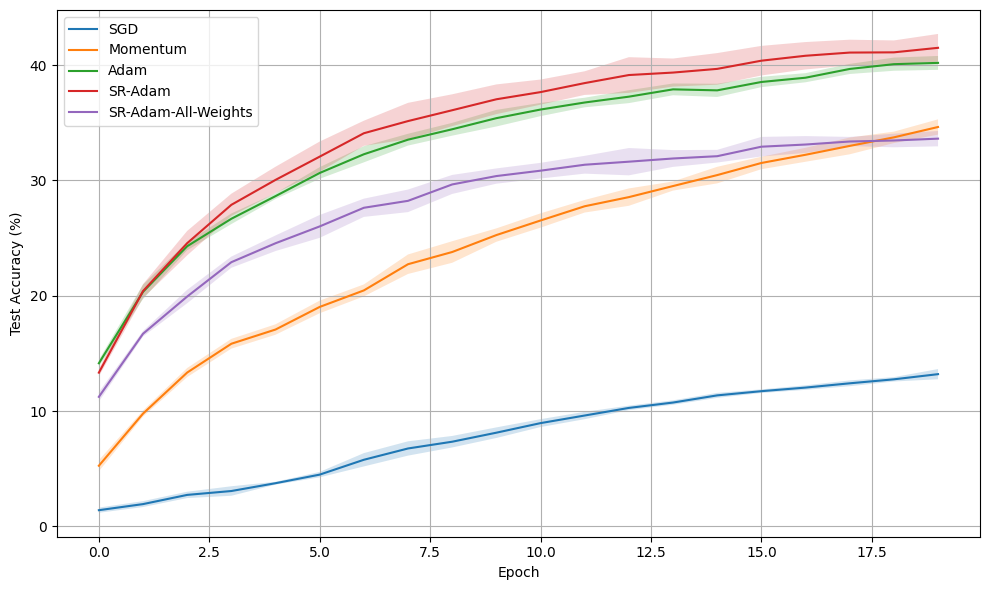

Saved epoch mean/std plot to results\CIFAR100\simplecnn\noise_0.05

=== Dataset: CIFAR100 | Noise: 0.1 ===
Using model: simplecnn
Files already downloaded and verified
Files already downloaded and verified

Optimizer: SGD (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]


Epoch 1/20 | Train Loss: 4.6032 | Train Acc: 1.13% | Test Loss: 4.5964 | Test Acc: 1.32% | Time: 30.95s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 10/20 | Train Loss: 4.2078 | Train Acc: 6.02% | Test Loss: 4.1155 | Test Acc: 7.75% | Time: 30.01s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 20/20 | Train Loss: 3.8845 | Train Acc: 10.63% | Test Loss: 3.7671 | Test Acc: 13.25% | Time: 30.16s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SGD\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SGD\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 1/20 | Train Loss: 4.6024 | Train Acc: 1.16% | Test Loss: 4.5963 | Test Acc: 1.31% | Time: 29.94s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Epoch 10/20 | Train Loss: 4.2170 | Train Acc: 6.49% | Test Loss: 4.1121 | Test Acc: 8.62% | Time: 29.60s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 20/20 | Train Loss: 3.9207 | Train Acc: 10.38% | Test Loss: 3.8040 | Test Acc: 12.72% | Time: 30.19s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SGD\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SGD\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 1/20 | Train Loss: 4.6023 | Train Acc: 1.19% | Test Loss: 4.5953 | Test Acc: 1.69% | Time: 29.90s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]


Epoch 10/20 | Train Loss: 4.2287 | Train Acc: 6.17% | Test Loss: 4.1321 | Test Acc: 7.70% | Time: 30.81s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 20/20 | Train Loss: 3.8964 | Train Acc: 10.66% | Test Loss: 3.7774 | Test Acc: 13.83% | Time: 30.24s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SGD\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SGD\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 1/20 | Train Loss: 4.6033 | Train Acc: 0.97% | Test Loss: 4.5959 | Test Acc: 1.11% | Time: 30.11s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 10/20 | Train Loss: 4.2218 | Train Acc: 6.18% | Test Loss: 4.1067 | Test Acc: 8.08% | Time: 30.17s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 20/20 | Train Loss: 3.9150 | Train Acc: 10.22% | Test Loss: 3.7942 | Test Acc: 12.90% | Time: 29.83s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SGD\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SGD\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]


Epoch 1/20 | Train Loss: 4.6012 | Train Acc: 1.28% | Test Loss: 4.5937 | Test Acc: 1.59% | Time: 29.75s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Epoch 10/20 | Train Loss: 4.1865 | Train Acc: 6.38% | Test Loss: 4.0774 | Test Acc: 8.79% | Time: 30.01s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Epoch 20/20 | Train Loss: 3.8917 | Train Acc: 10.82% | Test Loss: 3.7748 | Test Acc: 13.46% | Time: 30.00s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SGD\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SGD\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.1\SGD\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.1\SGD\batch_size_512\runs_and_aggregate.xlsx

Optimizer: Momentum (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]


Epoch 1/20 | Train Loss: 4.5499 | Train Acc: 2.15% | Test Loss: 4.3585 | Test Acc: 4.73% | Time: 31.02s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]


Epoch 10/20 | Train Loss: 3.2700 | Train Acc: 20.74% | Test Loss: 3.0747 | Test Acc: 25.38% | Time: 30.35s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]


Epoch 20/20 | Train Loss: 2.8583 | Train Acc: 28.48% | Test Loss: 2.5868 | Test Acc: 34.44% | Time: 30.90s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Momentum\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Momentum\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 1/20 | Train Loss: 4.5484 | Train Acc: 2.33% | Test Loss: 4.3724 | Test Acc: 4.84% | Time: 30.20s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 10/20 | Train Loss: 3.2977 | Train Acc: 20.13% | Test Loss: 3.1109 | Test Acc: 24.75% | Time: 30.08s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]


Epoch 20/20 | Train Loss: 2.9035 | Train Acc: 27.57% | Test Loss: 2.6449 | Test Acc: 33.20% | Time: 30.44s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Momentum\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Momentum\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]


Epoch 1/20 | Train Loss: 4.5485 | Train Acc: 2.34% | Test Loss: 4.3797 | Test Acc: 4.85% | Time: 30.47s


Epoch 10/20: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]


Epoch 10/20 | Train Loss: 3.2793 | Train Acc: 20.46% | Test Loss: 3.0904 | Test Acc: 25.47% | Time: 29.68s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]


Epoch 20/20 | Train Loss: 2.8436 | Train Acc: 28.65% | Test Loss: 2.5923 | Test Acc: 34.61% | Time: 30.67s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Momentum\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Momentum\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]


Epoch 1/20 | Train Loss: 4.5584 | Train Acc: 2.15% | Test Loss: 4.4042 | Test Acc: 5.32% | Time: 30.41s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]


Epoch 10/20 | Train Loss: 3.2498 | Train Acc: 21.26% | Test Loss: 3.0716 | Test Acc: 25.58% | Time: 30.88s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]


Epoch 20/20 | Train Loss: 2.8521 | Train Acc: 28.47% | Test Loss: 2.5795 | Test Acc: 34.52% | Time: 30.63s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Momentum\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Momentum\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]


Epoch 1/20 | Train Loss: 4.5328 | Train Acc: 2.55% | Test Loss: 4.2993 | Test Acc: 6.19% | Time: 30.61s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 10/20 | Train Loss: 3.2378 | Train Acc: 21.39% | Test Loss: 3.0146 | Test Acc: 26.43% | Time: 30.25s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 20/20 | Train Loss: 2.8429 | Train Acc: 28.81% | Test Loss: 2.5703 | Test Acc: 35.12% | Time: 30.20s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Momentum\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Momentum\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.1\Momentum\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.1\Momentum\batch_size_512\runs_and_aggregate.xlsx

Optimizer: Adam (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 1/20 | Train Loss: 4.2029 | Train Acc: 5.95% | Test Loss: 3.7610 | Test Acc: 13.77% | Time: 30.05s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]


Epoch 10/20 | Train Loss: 2.8910 | Train Acc: 27.67% | Test Loss: 2.6437 | Test Acc: 33.00% | Time: 30.33s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]


Epoch 20/20 | Train Loss: 2.6208 | Train Acc: 32.92% | Test Loss: 2.3712 | Test Acc: 39.00% | Time: 30.16s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Adam\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Adam\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]


Epoch 1/20 | Train Loss: 4.1818 | Train Acc: 6.74% | Test Loss: 3.7220 | Test Acc: 13.55% | Time: 31.26s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]


Epoch 10/20 | Train Loss: 2.9262 | Train Acc: 27.01% | Test Loss: 2.6513 | Test Acc: 33.66% | Time: 30.43s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]


Epoch 20/20 | Train Loss: 2.6614 | Train Acc: 32.14% | Test Loss: 2.3805 | Test Acc: 38.54% | Time: 31.30s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Adam\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Adam\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.50it/s]


Epoch 1/20 | Train Loss: 4.1803 | Train Acc: 6.61% | Test Loss: 3.7162 | Test Acc: 14.17% | Time: 30.70s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]


Epoch 10/20 | Train Loss: 2.8530 | Train Acc: 28.31% | Test Loss: 2.6057 | Test Acc: 34.14% | Time: 30.47s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.52it/s]


Epoch 20/20 | Train Loss: 2.6078 | Train Acc: 33.23% | Test Loss: 2.3641 | Test Acc: 38.89% | Time: 30.55s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Adam\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Adam\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.50it/s]


Epoch 1/20 | Train Loss: 4.1957 | Train Acc: 6.30% | Test Loss: 3.7132 | Test Acc: 14.18% | Time: 30.71s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]


Epoch 10/20 | Train Loss: 2.8470 | Train Acc: 28.65% | Test Loss: 2.5737 | Test Acc: 34.65% | Time: 29.85s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.52it/s]


Epoch 20/20 | Train Loss: 2.6155 | Train Acc: 33.28% | Test Loss: 2.3695 | Test Acc: 38.63% | Time: 30.59s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Adam\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Adam\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]


Epoch 1/20 | Train Loss: 4.1764 | Train Acc: 6.50% | Test Loss: 3.7494 | Test Acc: 13.24% | Time: 30.65s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]


Epoch 10/20 | Train Loss: 2.8476 | Train Acc: 28.66% | Test Loss: 2.5464 | Test Acc: 35.29% | Time: 31.28s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]


Epoch 20/20 | Train Loss: 2.5944 | Train Acc: 33.60% | Test Loss: 2.3410 | Test Acc: 40.06% | Time: 30.52s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Adam\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\Adam\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.1\Adam\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.1\Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.50it/s]


Epoch 1/20 | Train Loss: 4.2204 | Train Acc: 5.72% | Test Loss: 3.7836 | Test Acc: 13.34% | Time: 30.73s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]


Epoch 10/20 | Train Loss: 2.7464 | Train Acc: 30.20% | Test Loss: 2.4595 | Test Acc: 36.69% | Time: 30.44s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]


Epoch 20/20 | Train Loss: 2.5307 | Train Acc: 34.85% | Test Loss: 2.3522 | Test Acc: 39.63% | Time: 30.37s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.52it/s]


Epoch 1/20 | Train Loss: 4.2193 | Train Acc: 6.13% | Test Loss: 3.7729 | Test Acc: 13.06% | Time: 30.55s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]


Epoch 10/20 | Train Loss: 2.8135 | Train Acc: 28.99% | Test Loss: 2.5350 | Test Acc: 34.79% | Time: 30.50s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 20/20 | Train Loss: 2.5649 | Train Acc: 33.79% | Test Loss: 2.3339 | Test Acc: 39.79% | Time: 30.33s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]


Epoch 1/20 | Train Loss: 4.2040 | Train Acc: 6.31% | Test Loss: 3.7326 | Test Acc: 13.88% | Time: 31.55s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]


Epoch 10/20 | Train Loss: 2.7681 | Train Acc: 29.94% | Test Loss: 2.4981 | Test Acc: 35.85% | Time: 30.63s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]


Epoch 20/20 | Train Loss: 2.5257 | Train Acc: 34.54% | Test Loss: 2.3082 | Test Acc: 39.75% | Time: 31.40s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]


Epoch 1/20 | Train Loss: 4.2258 | Train Acc: 5.92% | Test Loss: 3.7677 | Test Acc: 12.45% | Time: 30.77s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.52it/s]


Epoch 10/20 | Train Loss: 2.7838 | Train Acc: 29.40% | Test Loss: 2.5050 | Test Acc: 36.37% | Time: 30.54s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.50it/s]


Epoch 20/20 | Train Loss: 2.5613 | Train Acc: 34.17% | Test Loss: 2.3177 | Test Acc: 40.20% | Time: 30.71s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]


Epoch 1/20 | Train Loss: 4.1938 | Train Acc: 6.33% | Test Loss: 3.7682 | Test Acc: 12.93% | Time: 30.81s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.58it/s]


Epoch 10/20 | Train Loss: 2.7162 | Train Acc: 30.98% | Test Loss: 2.4720 | Test Acc: 36.43% | Time: 30.12s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.50it/s]


Epoch 20/20 | Train Loss: 2.4768 | Train Acc: 35.62% | Test Loss: 2.2854 | Test Acc: 41.01% | Time: 30.73s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.1\SR-Adam\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.1\SR-Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam-All-Weights (batch_size: 512)

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.43it/s]


Epoch 1/20 | Train Loss: 4.2553 | Train Acc: 5.28% | Test Loss: 3.8390 | Test Acc: 11.76% | Time: 31.33s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]


Epoch 10/20 | Train Loss: 3.0363 | Train Acc: 24.41% | Test Loss: 2.7835 | Test Acc: 29.84% | Time: 31.45s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.46it/s]


Epoch 20/20 | Train Loss: 2.8431 | Train Acc: 27.94% | Test Loss: 2.6122 | Test Acc: 33.36% | Time: 31.06s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_1_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_1_last.pt

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.46it/s]


Epoch 1/20 | Train Loss: 4.2666 | Train Acc: 5.45% | Test Loss: 3.8459 | Test Acc: 11.56% | Time: 31.07s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]


Epoch 10/20 | Train Loss: 3.0663 | Train Acc: 23.95% | Test Loss: 2.8337 | Test Acc: 29.40% | Time: 30.52s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]


Epoch 20/20 | Train Loss: 2.8822 | Train Acc: 27.13% | Test Loss: 2.6501 | Test Acc: 32.90% | Time: 30.65s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_2_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_2_last.pt

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.50it/s]


Epoch 1/20 | Train Loss: 4.2676 | Train Acc: 5.37% | Test Loss: 3.8675 | Test Acc: 11.12% | Time: 30.68s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.50it/s]


Epoch 10/20 | Train Loss: 3.0907 | Train Acc: 23.57% | Test Loss: 2.8206 | Test Acc: 29.61% | Time: 30.74s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.50it/s]


Epoch 20/20 | Train Loss: 2.8435 | Train Acc: 27.93% | Test Loss: 2.6343 | Test Acc: 33.07% | Time: 30.68s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_3_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_3_last.pt

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]


Epoch 1/20 | Train Loss: 4.2914 | Train Acc: 5.21% | Test Loss: 3.8807 | Test Acc: 10.62% | Time: 30.67s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.56it/s]


Epoch 10/20 | Train Loss: 3.0892 | Train Acc: 23.43% | Test Loss: 2.8469 | Test Acc: 29.07% | Time: 30.28s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.52it/s]


Epoch 20/20 | Train Loss: 2.8697 | Train Acc: 27.62% | Test Loss: 2.6743 | Test Acc: 31.65% | Time: 30.55s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_4_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_4_last.pt

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]


Epoch 1/20 | Train Loss: 4.2546 | Train Acc: 5.26% | Test Loss: 3.8899 | Test Acc: 10.77% | Time: 30.75s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]


Epoch 10/20 | Train Loss: 3.0822 | Train Acc: 23.68% | Test Loss: 2.8530 | Test Acc: 28.93% | Time: 30.32s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]


Epoch 20/20 | Train Loss: 2.8943 | Train Acc: 27.24% | Test Loss: 2.6433 | Test Acc: 33.09% | Time: 30.46s
Saved best checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_5_best.pt
Saved last checkpoint to runs\CIFAR100\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\run_5_last.pt
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.1\SR-Adam-All-Weights\batch_size_512\runs_and_aggregate.xlsx
Updated Adam aggregates with statistical test results
Updated SR-Adam aggregates with statistical test results
Updated SR-Adam-All-Weights aggregates with statistical test results


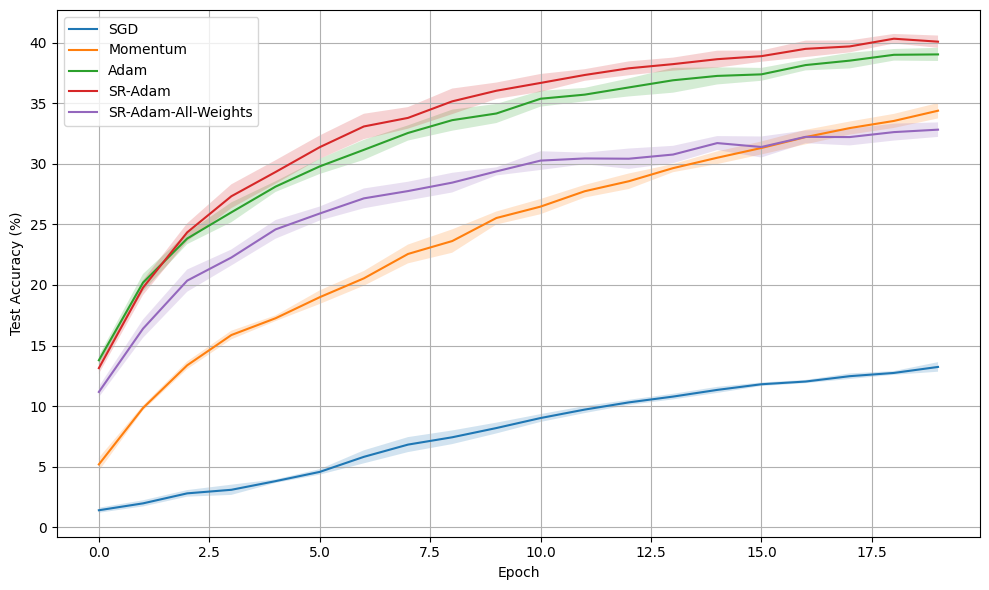

Saved epoch mean/std plot to results\CIFAR100\simplecnn\noise_0.1
Multi-run summary saved to results\summary_statistics.csv

FINAL GRID SUMMARY (mean ± std over runs)
CIFAR10|noise_0.0|SGD|bs_512: 48.79 ± 0.84 (best: 48.95 ± 0.74)

Noise summary for CIFAR10|simplecnn:
  Optimizer: SGD
    noise=0.0: 48.79 ± 0.84
    noise=0.05: 49.09 ± 0.74
    noise=0.1: 49.11 ± 0.69
  Optimizer: Momentum
    noise=0.0: 71.92 ± 0.91
    noise=0.05: 72.19 ± 0.71
    noise=0.1: 71.89 ± 0.61
  Optimizer: Adam
    noise=0.0: 73.77 ± 0.69
    noise=0.05: 73.54 ± 0.78
    noise=0.1: 72.59 ± 0.92
  Optimizer: SR-Adam
    noise=0.0: 75.48 ± 0.43
    noise=0.05: 75.75 ± 0.33
    noise=0.1: 75.21 ± 0.63
  Optimizer: SR-Adam-All-Weights
    noise=0.0: 70.58 ± 0.73
    noise=0.05: 70.97 ± 0.48
    noise=0.1: 70.31 ± 0.45
CIFAR10|noise_0.0|Momentum|bs_512: 71.92 ± 0.91 (best: 72.31 ± 0.47)
CIFAR10|noise_0.0|Adam|bs_512: 73.77 ± 0.69 (best: 74.12 ± 0.60)
CIFAR10|noise_0.0|SR-Adam|bs_512: 75.48 ± 0.43 (best: 75.59 ±

In [3]:
# Full sweep: all datasets and optimizers (cleans previous results)
%run main.py \
  --dataset ALL \
  --model simplecnn \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 5 \
  --optimizers ALL \
  --clean_previous


AGGREGATED SUMMARY (from results/.../aggregated_summary.json):
Dataset: CIFAR10, Noise: 0.05
Random Seed: 1000

Generating qualitative comparison figure for CIFAR10 with noise=0.05...
TIP: Try different seeds (e.g., --seed 42, --seed 123, --seed 999) to find the most informative samples!
Using random seed: 1000
Files already downloaded and verified
Loading best models...


D:\git\mamintoosi-papers-codes\SR-Adam\tools\generate_qualitative_comparison.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(f, map_location='cpu')



LOADED CHECKPOINT ACCURACIES (from best.pt files):
Adam best checkpoint:    74.70%
SR-Adam best checkpoint: 76.20%
Adam best: runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\run_3_best.pt
SR-Adam best: runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_3_best.pt



D:\git\mamintoosi-papers-codes\SR-Adam\tools\generate_qualitative_comparison.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, ma


Generating predictions for 10 samples...

✓ Saved comparison figure to paper/qualitative_cifar10_noise005.pdf


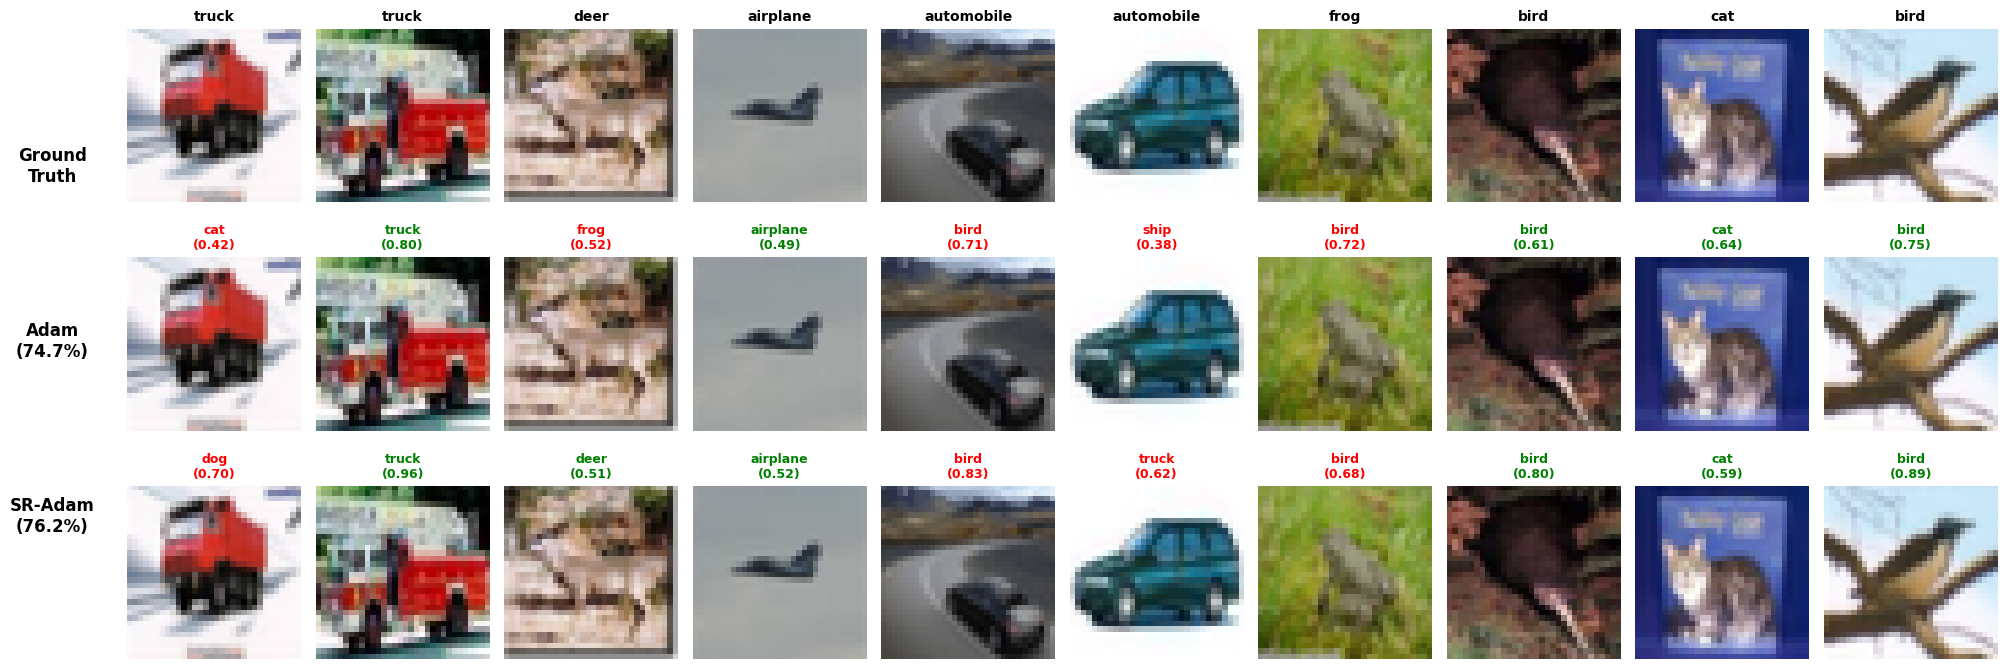


CHECKPOINT ACCURACIES USED IN PDF (from best.pt files):
Adam: 74.70%
SR-Adam: 76.20%

✓ Saved comparison to paper/qualitative_accuracy_comparison_cifar10_noise005.json

✓ Figure saved to paper/qualitative_cifar10_noise005.pdf

KEY INSIGHT:
  - Table shows MEAN ± STD across 5 runs
  - PDF shows accuracy of the BEST SINGLE RUN (highest checkpoint)
  - This explains why PDF values differ from table values!

Used seed=1000. To try different samples, use --seed with another value.


AGGREGATED SUMMARY (from results/.../aggregated_summary.json):
Dataset: CIFAR100, Noise: 0.05
Random Seed: 2026

Generating qualitative comparison figure for CIFAR100 with noise=0.05...
TIP: Try different seeds (e.g., --seed 42, --seed 123, --seed 999) to find the most informative samples!
Using random seed: 2026


D:\git\mamintoosi-papers-codes\SR-Adam\tools\generate_qualitative_comparison.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(f, map_location='cpu')


Files already downloaded and verified
Loading best models...


D:\git\mamintoosi-papers-codes\SR-Adam\tools\generate_qualitative_comparison.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(f, map_location='cpu')



LOADED CHECKPOINT ACCURACIES (from best.pt files):
Adam best checkpoint:    41.13%
SR-Adam best checkpoint: 43.29%
Adam best: runs\CIFAR100\simplecnn\noise_0.05\Adam\batch_size_512\run_5_best.pt
SR-Adam best: runs\CIFAR100\simplecnn\noise_0.05\SR-Adam\batch_size_512\run_5_best.pt



D:\git\mamintoosi-papers-codes\SR-Adam\tools\generate_qualitative_comparison.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, ma


Generating predictions for 10 samples...

✓ Saved comparison figure to paper/qualitative_cifar100_noise005.pdf


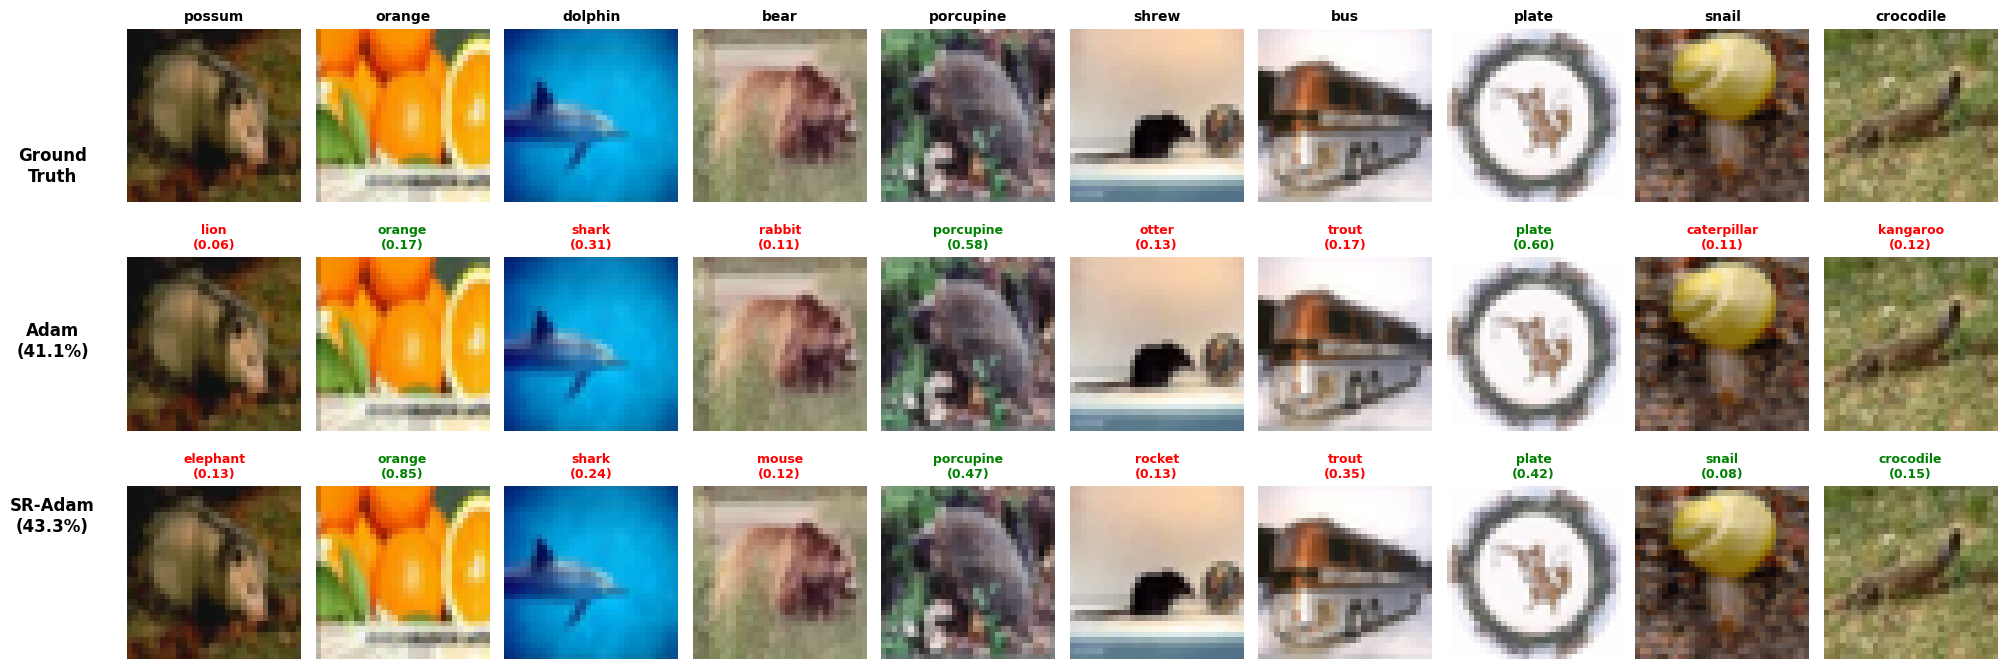


CHECKPOINT ACCURACIES USED IN PDF (from best.pt files):
Adam: 41.13%
SR-Adam: 43.29%

✓ Saved comparison to paper/qualitative_accuracy_comparison_cifar100_noise005.json

✓ Figure saved to paper/qualitative_cifar100_noise005.pdf

KEY INSIGHT:
  - Table shows MEAN ± STD across 5 runs
  - PDF shows accuracy of the BEST SINGLE RUN (highest checkpoint)
  - This explains why PDF values differ from table values!

Used seed=2026. To try different samples, use --seed with another value.



D:\git\mamintoosi-papers-codes\SR-Adam\tools\generate_qualitative_comparison.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(f, map_location='cpu')


In [4]:
# Generate qualitative figures (adjust seeds as needed)
%run tools/generate_qualitative_comparison.py --dataset CIFAR10  --noise 0.05 --seed 1000
%run tools/generate_qualitative_comparison.py --dataset CIFAR100 --noise 0.05 --seed 2026

In [ ]:
# Ablation study: Test different batch sizes for Adam and SR-Adam
# This will run with batch_size=[128, 256, 512, 2048] and save results in separate subdirectories
%run main.py \
  --dataset CIFAR10 \
  --num_epochs 20 \
  --num_runs 5 \
  --noise 0.1 \
  --optimizers "adam|sradam" \
  --batch_ablation 